In [17]:
"""
class ThalesRemoteScriptWrapper(object):
    r////////////////////////////////////////////////
    Wrapper that uses the ThalesRemoteConnection class.
    The commands are explained in the `Remote2-Manual <https://doc.zahner.de/manuals/remote2.pdf>`_.
    In the document you can also find a table with error numbers which are returned.

    :param remoteConnection: The connection object to the Thales software.
    /////////////////////////////////////////

    undefindedStandardErrorString: str = ""
    _remote_connection: ThalesRemoteConnection

    def __init__(self, remoteConnection: ThalesRemoteConnection):
        self._remote_connection = remoteConnection
        try:
            versionReply = self.getThalesVersion(timeout=1)
        except TermConnectionError as err:
            raise ThalesRemoteError(
                "Please update the Thales software, it is too old for this package version."
            )

        if "devel" in versionReply:
            print("devel version")
        elif "" == versionReply:
            # timeout
            raise ThalesRemoteError(
                "Please update the Thales software, it is too old for this package version."
            )
        else:
            match = re.search(r"(\d+.\d+.\d+)", versionReply)
            versionString = match.group(1)
            thalesToOld = versiontuple(versionString) < versiontuple(
                MINIMUM_THALES_VERSION
            )
            if thalesToOld:
                raise ThalesRemoteError(
                    f"Please update the Thales software. This package requires at least version {MINIMUM_THALES_VERSION}, but version {versionString} is installed."
                )
        return

# and

class PotentiostatMode(IntEnum):
    r"""
    #Working modes for the potentiostat
    """

    POTMODE_POTENTIOSTATIC = 1
    POTMODE_GALVANOSTATIC = 2
    POTMODE_PSEUDOGALVANOSTATIC = 3


"""

from thales_remote.connection import ThalesRemoteConnection
from thales_remote.script_wrapper import ThalesRemoteScriptWrapper, PotentiostatMode
import time
import csv
import os
import matplotlib.pyplot as plt

class ConstantPotentialExperiment(ThalesRemoteScriptWrapper):
    def hold_potential(self, potential: float, duration: float, sampling_interval: float = 1.0) -> None:
        """
        Potential to maintain (in volts)
        Total experiment time (in seconds)
        Time between current measurements (in seconds)
        """
        # Configure potentiostat
        self.setPotentiostatMode(PotentiostatMode.POTMODE_POTENTIOSTATIC)
        self.setPotential(potential)
        self.enablePotentiostat(True)
        


        try:
            times=[]
            current=[]
            # List of data.
            output_dir = r"C:\Users\harsh\OneDrive\Desktop\project\Exp_FeSO4_0.5M_with_H2SO4_0.5\CA"
            os.makedirs(output_dir, exist_ok=True)
            output_file = os.path.join(output_dir, "chrono_for_30min.csv")


            with open(output_file , mode="w" , newline="") as file:
                writer = csv.writer(file)
                writer.writerow(["Time (s)", "Current (A)"])


                start_time = time.time()
                elapsed = 0

            
                # this for real-time ploting
                plt.ion()  # now the intrectsion mode is on.
                fig, ax = plt.subplots()
                line, = ax.plot([], [], 'b.-')
                ax.set_xlabel("Time (s)")
                ax.set_ylabel("Current (A)")
                ax.set_title(f"Constant Potential : {potential} V")

                times = []
                currents = []
                
                # inside your while loop:
                while elapsed < duration:
                    current_value = self.getCurrent()
                    print(f"Time: {elapsed:.1f}s | Current: {current_value:.6f}A")
                    
                    writer.writerow([round(elapsed, 2), current_value])
                
                    #data plotting
                    times.append(round(elapsed, 2))
                    currents.append(current_value)
                
                    # updateing plotimg
                    line.set_xdata(times)
                    line.set_ydata(currents)
                    ax.relim()
                    ax.autoscale_view()
                    plt.draw()
                    plt.pause(0.01)
                
                    time.sleep(sampling_interval)
                    elapsed = time.time() - start_time           

    
                print(f"Data successfully saved to {os.path.abspath(output_file)}")

        finally:
            self.disablePotentiostat()
            print("Experiment completed. Potentiostat disabled.")



Connected to Thales ScriptRemote.
Time: 0.0s | Current: 0.000479A


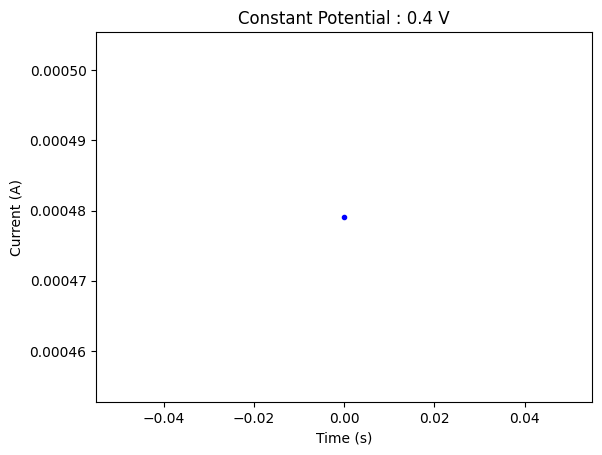

Time: 1.3s | Current: 0.000402A


<Figure size 640x480 with 0 Axes>

Time: 2.4s | Current: 0.000387A


<Figure size 640x480 with 0 Axes>

Time: 3.6s | Current: 0.000376A


<Figure size 640x480 with 0 Axes>

Time: 4.7s | Current: 0.000366A


<Figure size 640x480 with 0 Axes>

Time: 5.9s | Current: 0.000358A


<Figure size 640x480 with 0 Axes>

Time: 7.0s | Current: 0.000352A


<Figure size 640x480 with 0 Axes>

Time: 8.2s | Current: 0.000346A


<Figure size 640x480 with 0 Axes>

Time: 9.3s | Current: 0.000340A


<Figure size 640x480 with 0 Axes>

Time: 10.5s | Current: 0.000335A


<Figure size 640x480 with 0 Axes>

Time: 11.7s | Current: 0.000329A


<Figure size 640x480 with 0 Axes>

Time: 12.8s | Current: 0.000325A


<Figure size 640x480 with 0 Axes>

Time: 13.9s | Current: 0.000321A


<Figure size 640x480 with 0 Axes>

Time: 15.1s | Current: 0.000317A


<Figure size 640x480 with 0 Axes>

Time: 16.2s | Current: 0.000313A


<Figure size 640x480 with 0 Axes>

Time: 17.4s | Current: 0.000310A


<Figure size 640x480 with 0 Axes>

Time: 18.6s | Current: 0.000307A


<Figure size 640x480 with 0 Axes>

Time: 19.7s | Current: 0.000304A


<Figure size 640x480 with 0 Axes>

Time: 20.9s | Current: 0.000301A


<Figure size 640x480 with 0 Axes>

Time: 22.0s | Current: 0.000299A


<Figure size 640x480 with 0 Axes>

Time: 23.2s | Current: 0.000297A


<Figure size 640x480 with 0 Axes>

Time: 24.3s | Current: 0.000295A


<Figure size 640x480 with 0 Axes>

Time: 25.5s | Current: 0.000294A


<Figure size 640x480 with 0 Axes>

Time: 26.6s | Current: 0.000292A


<Figure size 640x480 with 0 Axes>

Time: 27.8s | Current: 0.000291A


<Figure size 640x480 with 0 Axes>

Time: 28.9s | Current: 0.000291A


<Figure size 640x480 with 0 Axes>

Time: 30.1s | Current: 0.000290A


<Figure size 640x480 with 0 Axes>

Time: 31.2s | Current: 0.000290A


<Figure size 640x480 with 0 Axes>

Time: 32.4s | Current: 0.000290A


<Figure size 640x480 with 0 Axes>

Time: 33.5s | Current: 0.000290A


<Figure size 640x480 with 0 Axes>

Time: 34.7s | Current: 0.000290A


<Figure size 640x480 with 0 Axes>

Time: 35.8s | Current: 0.000291A


<Figure size 640x480 with 0 Axes>

Time: 37.0s | Current: 0.000291A


<Figure size 640x480 with 0 Axes>

Time: 38.1s | Current: 0.000292A


<Figure size 640x480 with 0 Axes>

Time: 39.2s | Current: 0.000292A


<Figure size 640x480 with 0 Axes>

Time: 40.4s | Current: 0.000292A


<Figure size 640x480 with 0 Axes>

Time: 41.5s | Current: 0.000292A


<Figure size 640x480 with 0 Axes>

Time: 42.7s | Current: 0.000292A


<Figure size 640x480 with 0 Axes>

Time: 43.8s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 45.0s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 46.1s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 47.3s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 48.4s | Current: 0.000294A


<Figure size 640x480 with 0 Axes>

Time: 49.5s | Current: 0.000294A


<Figure size 640x480 with 0 Axes>

Time: 50.7s | Current: 0.000294A


<Figure size 640x480 with 0 Axes>

Time: 51.8s | Current: 0.000294A


<Figure size 640x480 with 0 Axes>

Time: 53.0s | Current: 0.000294A


<Figure size 640x480 with 0 Axes>

Time: 54.1s | Current: 0.000294A


<Figure size 640x480 with 0 Axes>

Time: 55.2s | Current: 0.000294A


<Figure size 640x480 with 0 Axes>

Time: 56.4s | Current: 0.000294A


<Figure size 640x480 with 0 Axes>

Time: 57.6s | Current: 0.000294A


<Figure size 640x480 with 0 Axes>

Time: 58.7s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 59.9s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 61.0s | Current: 0.000292A


<Figure size 640x480 with 0 Axes>

Time: 62.1s | Current: 0.000292A


<Figure size 640x480 with 0 Axes>

Time: 63.3s | Current: 0.000291A


<Figure size 640x480 with 0 Axes>

Time: 64.4s | Current: 0.000291A


<Figure size 640x480 with 0 Axes>

Time: 65.6s | Current: 0.000290A


<Figure size 640x480 with 0 Axes>

Time: 66.7s | Current: 0.000290A


<Figure size 640x480 with 0 Axes>

Time: 67.9s | Current: 0.000290A


<Figure size 640x480 with 0 Axes>

Time: 69.0s | Current: 0.000289A


<Figure size 640x480 with 0 Axes>

Time: 70.1s | Current: 0.000289A


<Figure size 640x480 with 0 Axes>

Time: 71.3s | Current: 0.000289A


<Figure size 640x480 with 0 Axes>

Time: 72.4s | Current: 0.000289A


<Figure size 640x480 with 0 Axes>

Time: 73.6s | Current: 0.000289A


<Figure size 640x480 with 0 Axes>

Time: 74.7s | Current: 0.000290A


<Figure size 640x480 with 0 Axes>

Time: 75.9s | Current: 0.000290A


<Figure size 640x480 with 0 Axes>

Time: 77.0s | Current: 0.000291A


<Figure size 640x480 with 0 Axes>

Time: 78.2s | Current: 0.000291A


<Figure size 640x480 with 0 Axes>

Time: 79.3s | Current: 0.000292A


<Figure size 640x480 with 0 Axes>

Time: 80.4s | Current: 0.000292A


<Figure size 640x480 with 0 Axes>

Time: 81.6s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 82.7s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 83.9s | Current: 0.000294A


<Figure size 640x480 with 0 Axes>

Time: 85.0s | Current: 0.000294A


<Figure size 640x480 with 0 Axes>

Time: 86.2s | Current: 0.000295A


<Figure size 640x480 with 0 Axes>

Time: 87.3s | Current: 0.000295A


<Figure size 640x480 with 0 Axes>

Time: 88.4s | Current: 0.000295A


<Figure size 640x480 with 0 Axes>

Time: 89.6s | Current: 0.000295A


<Figure size 640x480 with 0 Axes>

Time: 90.7s | Current: 0.000295A


<Figure size 640x480 with 0 Axes>

Time: 91.9s | Current: 0.000295A


<Figure size 640x480 with 0 Axes>

Time: 93.0s | Current: 0.000295A


<Figure size 640x480 with 0 Axes>

Time: 94.1s | Current: 0.000295A


<Figure size 640x480 with 0 Axes>

Time: 95.3s | Current: 0.000295A


<Figure size 640x480 with 0 Axes>

Time: 96.4s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 97.6s | Current: 0.000294A


<Figure size 640x480 with 0 Axes>

Time: 98.7s | Current: 0.000298A


<Figure size 640x480 with 0 Axes>

Time: 99.9s | Current: 0.000296A


<Figure size 640x480 with 0 Axes>

Time: 101.0s | Current: 0.000296A


<Figure size 640x480 with 0 Axes>

Time: 102.2s | Current: 0.000295A


<Figure size 640x480 with 0 Axes>

Time: 103.3s | Current: 0.000294A


<Figure size 640x480 with 0 Axes>

Time: 104.4s | Current: 0.000294A


<Figure size 640x480 with 0 Axes>

Time: 105.6s | Current: 0.000294A


<Figure size 640x480 with 0 Axes>

Time: 106.8s | Current: 0.000294A


<Figure size 640x480 with 0 Axes>

Time: 108.0s | Current: 0.000294A


<Figure size 640x480 with 0 Axes>

Time: 109.2s | Current: 0.000294A


<Figure size 640x480 with 0 Axes>

Time: 110.3s | Current: 0.000294A


<Figure size 640x480 with 0 Axes>

Time: 111.5s | Current: 0.000294A


<Figure size 640x480 with 0 Axes>

Time: 112.6s | Current: 0.000294A


<Figure size 640x480 with 0 Axes>

Time: 113.7s | Current: 0.000294A


<Figure size 640x480 with 0 Axes>

Time: 114.9s | Current: 0.000294A


<Figure size 640x480 with 0 Axes>

Time: 116.0s | Current: 0.000294A


<Figure size 640x480 with 0 Axes>

Time: 117.2s | Current: 0.000295A


<Figure size 640x480 with 0 Axes>

Time: 118.3s | Current: 0.000295A


<Figure size 640x480 with 0 Axes>

Time: 119.5s | Current: 0.000295A


<Figure size 640x480 with 0 Axes>

Time: 120.6s | Current: 0.000296A


<Figure size 640x480 with 0 Axes>

Time: 121.8s | Current: 0.000296A


<Figure size 640x480 with 0 Axes>

Time: 122.9s | Current: 0.000296A


<Figure size 640x480 with 0 Axes>

Time: 124.1s | Current: 0.000297A


<Figure size 640x480 with 0 Axes>

Time: 125.2s | Current: 0.000297A


<Figure size 640x480 with 0 Axes>

Time: 126.3s | Current: 0.000297A


<Figure size 640x480 with 0 Axes>

Time: 127.5s | Current: 0.000298A


<Figure size 640x480 with 0 Axes>

Time: 128.6s | Current: 0.000298A


<Figure size 640x480 with 0 Axes>

Time: 129.8s | Current: 0.000297A


<Figure size 640x480 with 0 Axes>

Time: 130.9s | Current: 0.000298A


<Figure size 640x480 with 0 Axes>

Time: 132.1s | Current: 0.000298A


<Figure size 640x480 with 0 Axes>

Time: 133.2s | Current: 0.000297A


<Figure size 640x480 with 0 Axes>

Time: 134.3s | Current: 0.000297A


<Figure size 640x480 with 0 Axes>

Time: 135.5s | Current: 0.000297A


<Figure size 640x480 with 0 Axes>

Time: 136.6s | Current: 0.000297A


<Figure size 640x480 with 0 Axes>

Time: 137.8s | Current: 0.000297A


<Figure size 640x480 with 0 Axes>

Time: 138.9s | Current: 0.000296A


<Figure size 640x480 with 0 Axes>

Time: 140.1s | Current: 0.000296A


<Figure size 640x480 with 0 Axes>

Time: 141.2s | Current: 0.000296A


<Figure size 640x480 with 0 Axes>

Time: 142.3s | Current: 0.000295A


<Figure size 640x480 with 0 Axes>

Time: 143.5s | Current: 0.000295A


<Figure size 640x480 with 0 Axes>

Time: 144.6s | Current: 0.000295A


<Figure size 640x480 with 0 Axes>

Time: 145.8s | Current: 0.000294A


<Figure size 640x480 with 0 Axes>

Time: 146.9s | Current: 0.000294A


<Figure size 640x480 with 0 Axes>

Time: 148.1s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 149.2s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 150.4s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 151.5s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 152.7s | Current: 0.000292A


<Figure size 640x480 with 0 Axes>

Time: 153.8s | Current: 0.000292A


<Figure size 640x480 with 0 Axes>

Time: 154.9s | Current: 0.000292A


<Figure size 640x480 with 0 Axes>

Time: 156.1s | Current: 0.000292A


<Figure size 640x480 with 0 Axes>

Time: 157.2s | Current: 0.000292A


<Figure size 640x480 with 0 Axes>

Time: 158.4s | Current: 0.000292A


<Figure size 640x480 with 0 Axes>

Time: 159.5s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 160.7s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 161.8s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 163.0s | Current: 0.000294A


<Figure size 640x480 with 0 Axes>

Time: 164.1s | Current: 0.000294A


<Figure size 640x480 with 0 Axes>

Time: 165.3s | Current: 0.000294A


<Figure size 640x480 with 0 Axes>

Time: 166.4s | Current: 0.000294A


<Figure size 640x480 with 0 Axes>

Time: 167.6s | Current: 0.000294A


<Figure size 640x480 with 0 Axes>

Time: 168.7s | Current: 0.000294A


<Figure size 640x480 with 0 Axes>

Time: 169.8s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 171.0s | Current: 0.000294A


<Figure size 640x480 with 0 Axes>

Time: 172.1s | Current: 0.000294A


<Figure size 640x480 with 0 Axes>

Time: 173.3s | Current: 0.000294A


<Figure size 640x480 with 0 Axes>

Time: 174.5s | Current: 0.000294A


<Figure size 640x480 with 0 Axes>

Time: 175.6s | Current: 0.000294A


<Figure size 640x480 with 0 Axes>

Time: 176.8s | Current: 0.000294A


<Figure size 640x480 with 0 Axes>

Time: 177.9s | Current: 0.000294A


<Figure size 640x480 with 0 Axes>

Time: 179.0s | Current: 0.000295A


<Figure size 640x480 with 0 Axes>

Time: 180.2s | Current: 0.000295A


<Figure size 640x480 with 0 Axes>

Time: 181.3s | Current: 0.000294A


<Figure size 640x480 with 0 Axes>

Time: 182.5s | Current: 0.000294A


<Figure size 640x480 with 0 Axes>

Time: 183.6s | Current: 0.000294A


<Figure size 640x480 with 0 Axes>

Time: 184.7s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 185.9s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 187.0s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 188.2s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 189.3s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 190.5s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 191.6s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 192.7s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 193.9s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 195.0s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 196.2s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 197.3s | Current: 0.000294A


<Figure size 640x480 with 0 Axes>

Time: 198.4s | Current: 0.000294A


<Figure size 640x480 with 0 Axes>

Time: 199.6s | Current: 0.000294A


<Figure size 640x480 with 0 Axes>

Time: 200.7s | Current: 0.000294A


<Figure size 640x480 with 0 Axes>

Time: 201.9s | Current: 0.000294A


<Figure size 640x480 with 0 Axes>

Time: 203.0s | Current: 0.000295A


<Figure size 640x480 with 0 Axes>

Time: 204.2s | Current: 0.000295A


<Figure size 640x480 with 0 Axes>

Time: 205.3s | Current: 0.000294A


<Figure size 640x480 with 0 Axes>

Time: 206.4s | Current: 0.000294A


<Figure size 640x480 with 0 Axes>

Time: 207.6s | Current: 0.000294A


<Figure size 640x480 with 0 Axes>

Time: 208.7s | Current: 0.000294A


<Figure size 640x480 with 0 Axes>

Time: 209.9s | Current: 0.000294A


<Figure size 640x480 with 0 Axes>

Time: 211.0s | Current: 0.000294A


<Figure size 640x480 with 0 Axes>

Time: 212.2s | Current: 0.000294A


<Figure size 640x480 with 0 Axes>

Time: 213.3s | Current: 0.000294A


<Figure size 640x480 with 0 Axes>

Time: 214.5s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 215.7s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 216.8s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 218.0s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 219.1s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 220.2s | Current: 0.000292A


<Figure size 640x480 with 0 Axes>

Time: 221.4s | Current: 0.000292A


<Figure size 640x480 with 0 Axes>

Time: 222.5s | Current: 0.000292A


<Figure size 640x480 with 0 Axes>

Time: 223.7s | Current: 0.000291A


<Figure size 640x480 with 0 Axes>

Time: 224.8s | Current: 0.000291A


<Figure size 640x480 with 0 Axes>

Time: 226.0s | Current: 0.000291A


<Figure size 640x480 with 0 Axes>

Time: 227.1s | Current: 0.000291A


<Figure size 640x480 with 0 Axes>

Time: 228.3s | Current: 0.000291A


<Figure size 640x480 with 0 Axes>

Time: 229.4s | Current: 0.000291A


<Figure size 640x480 with 0 Axes>

Time: 230.5s | Current: 0.000291A


<Figure size 640x480 with 0 Axes>

Time: 231.7s | Current: 0.000291A


<Figure size 640x480 with 0 Axes>

Time: 232.8s | Current: 0.000291A


<Figure size 640x480 with 0 Axes>

Time: 234.0s | Current: 0.000291A


<Figure size 640x480 with 0 Axes>

Time: 235.1s | Current: 0.000291A


<Figure size 640x480 with 0 Axes>

Time: 236.3s | Current: 0.000292A


<Figure size 640x480 with 0 Axes>

Time: 237.4s | Current: 0.000292A


<Figure size 640x480 with 0 Axes>

Time: 238.6s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 239.8s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 241.0s | Current: 0.000294A


<Figure size 640x480 with 0 Axes>

Time: 242.1s | Current: 0.000294A


<Figure size 640x480 with 0 Axes>

Time: 243.3s | Current: 0.000295A


<Figure size 640x480 with 0 Axes>

Time: 244.4s | Current: 0.000295A


<Figure size 640x480 with 0 Axes>

Time: 245.6s | Current: 0.000295A


<Figure size 640x480 with 0 Axes>

Time: 246.7s | Current: 0.000295A


<Figure size 640x480 with 0 Axes>

Time: 247.9s | Current: 0.000295A


<Figure size 640x480 with 0 Axes>

Time: 249.0s | Current: 0.000295A


<Figure size 640x480 with 0 Axes>

Time: 250.2s | Current: 0.000295A


<Figure size 640x480 with 0 Axes>

Time: 251.3s | Current: 0.000295A


<Figure size 640x480 with 0 Axes>

Time: 252.4s | Current: 0.000295A


<Figure size 640x480 with 0 Axes>

Time: 253.6s | Current: 0.000295A


<Figure size 640x480 with 0 Axes>

Time: 254.7s | Current: 0.000295A


<Figure size 640x480 with 0 Axes>

Time: 255.9s | Current: 0.000295A


<Figure size 640x480 with 0 Axes>

Time: 257.0s | Current: 0.000295A


<Figure size 640x480 with 0 Axes>

Time: 258.2s | Current: 0.000295A


<Figure size 640x480 with 0 Axes>

Time: 259.3s | Current: 0.000295A


<Figure size 640x480 with 0 Axes>

Time: 260.5s | Current: 0.000295A


<Figure size 640x480 with 0 Axes>

Time: 261.6s | Current: 0.000295A


<Figure size 640x480 with 0 Axes>

Time: 262.8s | Current: 0.000295A


<Figure size 640x480 with 0 Axes>

Time: 263.9s | Current: 0.000295A


<Figure size 640x480 with 0 Axes>

Time: 265.1s | Current: 0.000295A


<Figure size 640x480 with 0 Axes>

Time: 266.2s | Current: 0.000294A


<Figure size 640x480 with 0 Axes>

Time: 267.4s | Current: 0.000294A


<Figure size 640x480 with 0 Axes>

Time: 268.5s | Current: 0.000294A


<Figure size 640x480 with 0 Axes>

Time: 269.7s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 270.8s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 272.0s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 273.1s | Current: 0.000292A


<Figure size 640x480 with 0 Axes>

Time: 274.3s | Current: 0.000292A


<Figure size 640x480 with 0 Axes>

Time: 275.4s | Current: 0.000292A


<Figure size 640x480 with 0 Axes>

Time: 276.6s | Current: 0.000291A


<Figure size 640x480 with 0 Axes>

Time: 277.7s | Current: 0.000291A


<Figure size 640x480 with 0 Axes>

Time: 278.8s | Current: 0.000291A


<Figure size 640x480 with 0 Axes>

Time: 280.0s | Current: 0.000291A


<Figure size 640x480 with 0 Axes>

Time: 281.1s | Current: 0.000291A


<Figure size 640x480 with 0 Axes>

Time: 282.3s | Current: 0.000291A


<Figure size 640x480 with 0 Axes>

Time: 283.4s | Current: 0.000291A


<Figure size 640x480 with 0 Axes>

Time: 284.6s | Current: 0.000291A


<Figure size 640x480 with 0 Axes>

Time: 285.7s | Current: 0.000290A


<Figure size 640x480 with 0 Axes>

Time: 286.8s | Current: 0.000290A


<Figure size 640x480 with 0 Axes>

Time: 288.0s | Current: 0.000290A


<Figure size 640x480 with 0 Axes>

Time: 289.1s | Current: 0.000290A


<Figure size 640x480 with 0 Axes>

Time: 290.3s | Current: 0.000290A


<Figure size 640x480 with 0 Axes>

Time: 291.4s | Current: 0.000290A


<Figure size 640x480 with 0 Axes>

Time: 292.6s | Current: 0.000290A


<Figure size 640x480 with 0 Axes>

Time: 293.7s | Current: 0.000290A


<Figure size 640x480 with 0 Axes>

Time: 294.9s | Current: 0.000291A


<Figure size 640x480 with 0 Axes>

Time: 296.0s | Current: 0.000291A


<Figure size 640x480 with 0 Axes>

Time: 297.2s | Current: 0.000291A


<Figure size 640x480 with 0 Axes>

Time: 298.3s | Current: 0.000291A


<Figure size 640x480 with 0 Axes>

Time: 299.5s | Current: 0.000291A


<Figure size 640x480 with 0 Axes>

Time: 300.7s | Current: 0.000291A


<Figure size 640x480 with 0 Axes>

Time: 301.8s | Current: 0.000291A


<Figure size 640x480 with 0 Axes>

Time: 303.0s | Current: 0.000290A


<Figure size 640x480 with 0 Axes>

Time: 304.1s | Current: 0.000290A


<Figure size 640x480 with 0 Axes>

Time: 305.3s | Current: 0.000290A


<Figure size 640x480 with 0 Axes>

Time: 306.4s | Current: 0.000290A


<Figure size 640x480 with 0 Axes>

Time: 307.6s | Current: 0.000290A


<Figure size 640x480 with 0 Axes>

Time: 308.7s | Current: 0.000290A


<Figure size 640x480 with 0 Axes>

Time: 309.8s | Current: 0.000290A


<Figure size 640x480 with 0 Axes>

Time: 311.0s | Current: 0.000290A


<Figure size 640x480 with 0 Axes>

Time: 312.1s | Current: 0.000291A


<Figure size 640x480 with 0 Axes>

Time: 313.3s | Current: 0.000291A


<Figure size 640x480 with 0 Axes>

Time: 314.4s | Current: 0.000291A


<Figure size 640x480 with 0 Axes>

Time: 315.6s | Current: 0.000291A


<Figure size 640x480 with 0 Axes>

Time: 316.7s | Current: 0.000291A


<Figure size 640x480 with 0 Axes>

Time: 317.8s | Current: 0.000291A


<Figure size 640x480 with 0 Axes>

Time: 319.0s | Current: 0.000292A


<Figure size 640x480 with 0 Axes>

Time: 320.1s | Current: 0.000292A


<Figure size 640x480 with 0 Axes>

Time: 321.3s | Current: 0.000292A


<Figure size 640x480 with 0 Axes>

Time: 322.4s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 323.6s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 324.7s | Current: 0.000294A


<Figure size 640x480 with 0 Axes>

Time: 325.8s | Current: 0.000294A


<Figure size 640x480 with 0 Axes>

Time: 327.0s | Current: 0.000294A


<Figure size 640x480 with 0 Axes>

Time: 328.1s | Current: 0.000295A


<Figure size 640x480 with 0 Axes>

Time: 329.3s | Current: 0.000295A


<Figure size 640x480 with 0 Axes>

Time: 330.4s | Current: 0.000295A


<Figure size 640x480 with 0 Axes>

Time: 331.6s | Current: 0.000295A


<Figure size 640x480 with 0 Axes>

Time: 332.7s | Current: 0.000295A


<Figure size 640x480 with 0 Axes>

Time: 333.8s | Current: 0.000295A


<Figure size 640x480 with 0 Axes>

Time: 335.0s | Current: 0.000295A


<Figure size 640x480 with 0 Axes>

Time: 336.1s | Current: 0.000295A


<Figure size 640x480 with 0 Axes>

Time: 337.3s | Current: 0.000295A


<Figure size 640x480 with 0 Axes>

Time: 338.5s | Current: 0.000295A


<Figure size 640x480 with 0 Axes>

Time: 339.6s | Current: 0.000294A


<Figure size 640x480 with 0 Axes>

Time: 340.8s | Current: 0.000294A


<Figure size 640x480 with 0 Axes>

Time: 341.9s | Current: 0.000294A


<Figure size 640x480 with 0 Axes>

Time: 343.1s | Current: 0.000294A


<Figure size 640x480 with 0 Axes>

Time: 344.2s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 345.3s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 346.5s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 347.6s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 348.8s | Current: 0.000292A


<Figure size 640x480 with 0 Axes>

Time: 349.9s | Current: 0.000292A


<Figure size 640x480 with 0 Axes>

Time: 351.1s | Current: 0.000292A


<Figure size 640x480 with 0 Axes>

Time: 352.2s | Current: 0.000292A


<Figure size 640x480 with 0 Axes>

Time: 353.4s | Current: 0.000292A


<Figure size 640x480 with 0 Axes>

Time: 354.5s | Current: 0.000291A


<Figure size 640x480 with 0 Axes>

Time: 355.6s | Current: 0.000291A


<Figure size 640x480 with 0 Axes>

Time: 356.8s | Current: 0.000292A


<Figure size 640x480 with 0 Axes>

Time: 357.9s | Current: 0.000292A


<Figure size 640x480 with 0 Axes>

Time: 359.1s | Current: 0.000292A


<Figure size 640x480 with 0 Axes>

Time: 360.2s | Current: 0.000292A


<Figure size 640x480 with 0 Axes>

Time: 361.3s | Current: 0.000292A


<Figure size 640x480 with 0 Axes>

Time: 362.5s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 363.6s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 364.8s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 365.9s | Current: 0.000294A


<Figure size 640x480 with 0 Axes>

Time: 367.1s | Current: 0.000294A


<Figure size 640x480 with 0 Axes>

Time: 368.2s | Current: 0.000294A


<Figure size 640x480 with 0 Axes>

Time: 369.3s | Current: 0.000294A


<Figure size 640x480 with 0 Axes>

Time: 370.5s | Current: 0.000294A


<Figure size 640x480 with 0 Axes>

Time: 371.6s | Current: 0.000294A


<Figure size 640x480 with 0 Axes>

Time: 372.8s | Current: 0.000294A


<Figure size 640x480 with 0 Axes>

Time: 373.9s | Current: 0.000294A


<Figure size 640x480 with 0 Axes>

Time: 375.1s | Current: 0.000294A


<Figure size 640x480 with 0 Axes>

Time: 376.2s | Current: 0.000294A


<Figure size 640x480 with 0 Axes>

Time: 377.4s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 378.5s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 379.7s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 380.8s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 382.0s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 383.1s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 384.3s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 385.4s | Current: 0.000292A


<Figure size 640x480 with 0 Axes>

Time: 386.6s | Current: 0.000292A


<Figure size 640x480 with 0 Axes>

Time: 387.7s | Current: 0.000292A


<Figure size 640x480 with 0 Axes>

Time: 388.8s | Current: 0.000292A


<Figure size 640x480 with 0 Axes>

Time: 390.0s | Current: 0.000292A


<Figure size 640x480 with 0 Axes>

Time: 391.1s | Current: 0.000292A


<Figure size 640x480 with 0 Axes>

Time: 392.3s | Current: 0.000292A


<Figure size 640x480 with 0 Axes>

Time: 393.4s | Current: 0.000291A


<Figure size 640x480 with 0 Axes>

Time: 394.6s | Current: 0.000291A


<Figure size 640x480 with 0 Axes>

Time: 395.7s | Current: 0.000292A


<Figure size 640x480 with 0 Axes>

Time: 396.9s | Current: 0.000292A


<Figure size 640x480 with 0 Axes>

Time: 398.0s | Current: 0.000292A


<Figure size 640x480 with 0 Axes>

Time: 399.1s | Current: 0.000292A


<Figure size 640x480 with 0 Axes>

Time: 400.3s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 401.4s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 402.6s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 403.7s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 404.9s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 406.0s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 407.1s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 408.3s | Current: 0.000292A


<Figure size 640x480 with 0 Axes>

Time: 409.4s | Current: 0.000292A


<Figure size 640x480 with 0 Axes>

Time: 410.6s | Current: 0.000292A


<Figure size 640x480 with 0 Axes>

Time: 411.7s | Current: 0.000292A


<Figure size 640x480 with 0 Axes>

Time: 412.9s | Current: 0.000292A


<Figure size 640x480 with 0 Axes>

Time: 414.0s | Current: 0.000291A


<Figure size 640x480 with 0 Axes>

Time: 415.1s | Current: 0.000291A


<Figure size 640x480 with 0 Axes>

Time: 416.3s | Current: 0.000291A


<Figure size 640x480 with 0 Axes>

Time: 417.4s | Current: 0.000291A


<Figure size 640x480 with 0 Axes>

Time: 418.6s | Current: 0.000291A


<Figure size 640x480 with 0 Axes>

Time: 419.7s | Current: 0.000291A


<Figure size 640x480 with 0 Axes>

Time: 420.8s | Current: 0.000291A


<Figure size 640x480 with 0 Axes>

Time: 422.0s | Current: 0.000291A


<Figure size 640x480 with 0 Axes>

Time: 423.1s | Current: 0.000291A


<Figure size 640x480 with 0 Axes>

Time: 424.3s | Current: 0.000291A


<Figure size 640x480 with 0 Axes>

Time: 425.4s | Current: 0.000291A


<Figure size 640x480 with 0 Axes>

Time: 426.6s | Current: 0.000291A


<Figure size 640x480 with 0 Axes>

Time: 427.7s | Current: 0.000291A


<Figure size 640x480 with 0 Axes>

Time: 428.9s | Current: 0.000291A


<Figure size 640x480 with 0 Axes>

Time: 430.1s | Current: 0.000292A


<Figure size 640x480 with 0 Axes>

Time: 431.2s | Current: 0.000292A


<Figure size 640x480 with 0 Axes>

Time: 432.4s | Current: 0.000292A


<Figure size 640x480 with 0 Axes>

Time: 433.5s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 434.6s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 435.8s | Current: 0.000294A


<Figure size 640x480 with 0 Axes>

Time: 436.9s | Current: 0.000294A


<Figure size 640x480 with 0 Axes>

Time: 438.1s | Current: 0.000295A


<Figure size 640x480 with 0 Axes>

Time: 439.2s | Current: 0.000295A


<Figure size 640x480 with 0 Axes>

Time: 440.4s | Current: 0.000295A


<Figure size 640x480 with 0 Axes>

Time: 441.5s | Current: 0.000295A


<Figure size 640x480 with 0 Axes>

Time: 442.6s | Current: 0.000295A


<Figure size 640x480 with 0 Axes>

Time: 443.8s | Current: 0.000295A


<Figure size 640x480 with 0 Axes>

Time: 444.9s | Current: 0.000295A


<Figure size 640x480 with 0 Axes>

Time: 446.1s | Current: 0.000294A


<Figure size 640x480 with 0 Axes>

Time: 447.2s | Current: 0.000294A


<Figure size 640x480 with 0 Axes>

Time: 448.3s | Current: 0.000294A


<Figure size 640x480 with 0 Axes>

Time: 449.5s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 450.6s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 451.8s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 452.9s | Current: 0.000292A


<Figure size 640x480 with 0 Axes>

Time: 454.1s | Current: 0.000292A


<Figure size 640x480 with 0 Axes>

Time: 455.2s | Current: 0.000291A


<Figure size 640x480 with 0 Axes>

Time: 456.3s | Current: 0.000291A


<Figure size 640x480 with 0 Axes>

Time: 457.5s | Current: 0.000291A


<Figure size 640x480 with 0 Axes>

Time: 458.6s | Current: 0.000291A


<Figure size 640x480 with 0 Axes>

Time: 459.8s | Current: 0.000291A


<Figure size 640x480 with 0 Axes>

Time: 460.9s | Current: 0.000291A


<Figure size 640x480 with 0 Axes>

Time: 462.1s | Current: 0.000291A


<Figure size 640x480 with 0 Axes>

Time: 463.2s | Current: 0.000291A


<Figure size 640x480 with 0 Axes>

Time: 464.4s | Current: 0.000291A


<Figure size 640x480 with 0 Axes>

Time: 465.5s | Current: 0.000291A


<Figure size 640x480 with 0 Axes>

Time: 466.7s | Current: 0.000291A


<Figure size 640x480 with 0 Axes>

Time: 467.8s | Current: 0.000292A


<Figure size 640x480 with 0 Axes>

Time: 469.0s | Current: 0.000292A


<Figure size 640x480 with 0 Axes>

Time: 470.1s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 471.3s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 472.4s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 473.5s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 474.7s | Current: 0.000294A


<Figure size 640x480 with 0 Axes>

Time: 475.8s | Current: 0.000294A


<Figure size 640x480 with 0 Axes>

Time: 477.0s | Current: 0.000294A


<Figure size 640x480 with 0 Axes>

Time: 478.1s | Current: 0.000294A


<Figure size 640x480 with 0 Axes>

Time: 479.2s | Current: 0.000294A


<Figure size 640x480 with 0 Axes>

Time: 480.4s | Current: 0.000294A


<Figure size 640x480 with 0 Axes>

Time: 481.6s | Current: 0.000294A


<Figure size 640x480 with 0 Axes>

Time: 482.7s | Current: 0.000294A


<Figure size 640x480 with 0 Axes>

Time: 483.9s | Current: 0.000294A


<Figure size 640x480 with 0 Axes>

Time: 485.0s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 486.2s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 487.3s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 488.4s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 489.6s | Current: 0.000292A


<Figure size 640x480 with 0 Axes>

Time: 490.7s | Current: 0.000292A


<Figure size 640x480 with 0 Axes>

Time: 491.9s | Current: 0.000292A


<Figure size 640x480 with 0 Axes>

Time: 493.0s | Current: 0.000292A


<Figure size 640x480 with 0 Axes>

Time: 494.2s | Current: 0.000292A


<Figure size 640x480 with 0 Axes>

Time: 495.3s | Current: 0.000292A


<Figure size 640x480 with 0 Axes>

Time: 496.4s | Current: 0.000292A


<Figure size 640x480 with 0 Axes>

Time: 497.6s | Current: 0.000292A


<Figure size 640x480 with 0 Axes>

Time: 498.7s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 499.9s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 501.0s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 502.1s | Current: 0.000294A


<Figure size 640x480 with 0 Axes>

Time: 503.3s | Current: 0.000295A


<Figure size 640x480 with 0 Axes>

Time: 504.4s | Current: 0.000295A


<Figure size 640x480 with 0 Axes>

Time: 505.6s | Current: 0.000295A


<Figure size 640x480 with 0 Axes>

Time: 506.7s | Current: 0.000296A


<Figure size 640x480 with 0 Axes>

Time: 507.9s | Current: 0.000296A


<Figure size 640x480 with 0 Axes>

Time: 509.0s | Current: 0.000296A


<Figure size 640x480 with 0 Axes>

Time: 510.2s | Current: 0.000296A


<Figure size 640x480 with 0 Axes>

Time: 511.3s | Current: 0.000296A


<Figure size 640x480 with 0 Axes>

Time: 512.5s | Current: 0.000296A


<Figure size 640x480 with 0 Axes>

Time: 513.6s | Current: 0.000295A


<Figure size 640x480 with 0 Axes>

Time: 514.8s | Current: 0.000295A


<Figure size 640x480 with 0 Axes>

Time: 515.9s | Current: 0.000295A


<Figure size 640x480 with 0 Axes>

Time: 517.1s | Current: 0.000294A


<Figure size 640x480 with 0 Axes>

Time: 518.2s | Current: 0.000294A


<Figure size 640x480 with 0 Axes>

Time: 519.4s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 520.5s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 521.7s | Current: 0.000292A


<Figure size 640x480 with 0 Axes>

Time: 522.8s | Current: 0.000292A


<Figure size 640x480 with 0 Axes>

Time: 524.0s | Current: 0.000291A


<Figure size 640x480 with 0 Axes>

Time: 525.1s | Current: 0.000291A


<Figure size 640x480 with 0 Axes>

Time: 526.3s | Current: 0.000291A


<Figure size 640x480 with 0 Axes>

Time: 527.4s | Current: 0.000290A


<Figure size 640x480 with 0 Axes>

Time: 528.6s | Current: 0.000290A


<Figure size 640x480 with 0 Axes>

Time: 529.7s | Current: 0.000290A


<Figure size 640x480 with 0 Axes>

Time: 530.9s | Current: 0.000290A


<Figure size 640x480 with 0 Axes>

Time: 532.0s | Current: 0.000290A


<Figure size 640x480 with 0 Axes>

Time: 533.2s | Current: 0.000291A


<Figure size 640x480 with 0 Axes>

Time: 534.3s | Current: 0.000291A


<Figure size 640x480 with 0 Axes>

Time: 535.4s | Current: 0.000292A


<Figure size 640x480 with 0 Axes>

Time: 536.6s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 537.7s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 538.9s | Current: 0.000294A


<Figure size 640x480 with 0 Axes>

Time: 540.0s | Current: 0.000294A


<Figure size 640x480 with 0 Axes>

Time: 541.1s | Current: 0.000295A


<Figure size 640x480 with 0 Axes>

Time: 542.3s | Current: 0.000296A


<Figure size 640x480 with 0 Axes>

Time: 543.4s | Current: 0.000296A


<Figure size 640x480 with 0 Axes>

Time: 544.6s | Current: 0.000296A


<Figure size 640x480 with 0 Axes>

Time: 545.7s | Current: 0.000296A


<Figure size 640x480 with 0 Axes>

Time: 546.9s | Current: 0.000296A


<Figure size 640x480 with 0 Axes>

Time: 548.0s | Current: 0.000296A


<Figure size 640x480 with 0 Axes>

Time: 549.1s | Current: 0.000296A


<Figure size 640x480 with 0 Axes>

Time: 550.3s | Current: 0.000296A


<Figure size 640x480 with 0 Axes>

Time: 551.4s | Current: 0.000296A


<Figure size 640x480 with 0 Axes>

Time: 552.6s | Current: 0.000296A


<Figure size 640x480 with 0 Axes>

Time: 553.7s | Current: 0.000295A


<Figure size 640x480 with 0 Axes>

Time: 554.9s | Current: 0.000295A


<Figure size 640x480 with 0 Axes>

Time: 556.0s | Current: 0.000294A


<Figure size 640x480 with 0 Axes>

Time: 557.2s | Current: 0.000294A


<Figure size 640x480 with 0 Axes>

Time: 558.3s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 559.5s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 560.6s | Current: 0.000292A


<Figure size 640x480 with 0 Axes>

Time: 561.7s | Current: 0.000292A


<Figure size 640x480 with 0 Axes>

Time: 562.9s | Current: 0.000292A


<Figure size 640x480 with 0 Axes>

Time: 564.0s | Current: 0.000291A


<Figure size 640x480 with 0 Axes>

Time: 565.2s | Current: 0.000291A


<Figure size 640x480 with 0 Axes>

Time: 566.3s | Current: 0.000291A


<Figure size 640x480 with 0 Axes>

Time: 567.5s | Current: 0.000290A


<Figure size 640x480 with 0 Axes>

Time: 568.6s | Current: 0.000290A


<Figure size 640x480 with 0 Axes>

Time: 569.7s | Current: 0.000290A


<Figure size 640x480 with 0 Axes>

Time: 570.9s | Current: 0.000291A


<Figure size 640x480 with 0 Axes>

Time: 572.0s | Current: 0.000291A


<Figure size 640x480 with 0 Axes>

Time: 573.2s | Current: 0.000291A


<Figure size 640x480 with 0 Axes>

Time: 574.3s | Current: 0.000292A


<Figure size 640x480 with 0 Axes>

Time: 575.5s | Current: 0.000292A


<Figure size 640x480 with 0 Axes>

Time: 576.7s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 577.8s | Current: 0.000294A


<Figure size 640x480 with 0 Axes>

Time: 579.0s | Current: 0.000294A


<Figure size 640x480 with 0 Axes>

Time: 580.1s | Current: 0.000295A


<Figure size 640x480 with 0 Axes>

Time: 581.3s | Current: 0.000295A


<Figure size 640x480 with 0 Axes>

Time: 582.4s | Current: 0.000295A


<Figure size 640x480 with 0 Axes>

Time: 583.6s | Current: 0.000295A


<Figure size 640x480 with 0 Axes>

Time: 584.7s | Current: 0.000295A


<Figure size 640x480 with 0 Axes>

Time: 585.9s | Current: 0.000295A


<Figure size 640x480 with 0 Axes>

Time: 587.0s | Current: 0.000295A


<Figure size 640x480 with 0 Axes>

Time: 588.1s | Current: 0.000295A


<Figure size 640x480 with 0 Axes>

Time: 589.3s | Current: 0.000295A


<Figure size 640x480 with 0 Axes>

Time: 590.4s | Current: 0.000295A


<Figure size 640x480 with 0 Axes>

Time: 591.6s | Current: 0.000295A


<Figure size 640x480 with 0 Axes>

Time: 592.7s | Current: 0.000295A


<Figure size 640x480 with 0 Axes>

Time: 593.8s | Current: 0.000294A


<Figure size 640x480 with 0 Axes>

Time: 595.0s | Current: 0.000294A


<Figure size 640x480 with 0 Axes>

Time: 596.1s | Current: 0.000294A


<Figure size 640x480 with 0 Axes>

Time: 597.3s | Current: 0.000294A


<Figure size 640x480 with 0 Axes>

Time: 598.4s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 599.6s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 600.7s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 601.8s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 603.0s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 604.1s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 605.3s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 606.4s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 607.6s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 608.7s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 609.8s | Current: 0.000294A


<Figure size 640x480 with 0 Axes>

Time: 611.0s | Current: 0.000294A


<Figure size 640x480 with 0 Axes>

Time: 612.1s | Current: 0.000294A


<Figure size 640x480 with 0 Axes>

Time: 613.3s | Current: 0.000294A


<Figure size 640x480 with 0 Axes>

Time: 614.4s | Current: 0.000294A


<Figure size 640x480 with 0 Axes>

Time: 615.5s | Current: 0.000295A


<Figure size 640x480 with 0 Axes>

Time: 616.7s | Current: 0.000295A


<Figure size 640x480 with 0 Axes>

Time: 617.8s | Current: 0.000295A


<Figure size 640x480 with 0 Axes>

Time: 619.0s | Current: 0.000295A


<Figure size 640x480 with 0 Axes>

Time: 620.1s | Current: 0.000295A


<Figure size 640x480 with 0 Axes>

Time: 621.3s | Current: 0.000295A


<Figure size 640x480 with 0 Axes>

Time: 622.4s | Current: 0.000295A


<Figure size 640x480 with 0 Axes>

Time: 623.5s | Current: 0.000294A


<Figure size 640x480 with 0 Axes>

Time: 624.7s | Current: 0.000294A


<Figure size 640x480 with 0 Axes>

Time: 625.8s | Current: 0.000294A


<Figure size 640x480 with 0 Axes>

Time: 627.0s | Current: 0.000294A


<Figure size 640x480 with 0 Axes>

Time: 628.1s | Current: 0.000294A


<Figure size 640x480 with 0 Axes>

Time: 629.3s | Current: 0.000294A


<Figure size 640x480 with 0 Axes>

Time: 630.4s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 631.5s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 632.7s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 633.8s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 635.0s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 636.1s | Current: 0.000292A


<Figure size 640x480 with 0 Axes>

Time: 637.3s | Current: 0.000292A


<Figure size 640x480 with 0 Axes>

Time: 638.4s | Current: 0.000292A


<Figure size 640x480 with 0 Axes>

Time: 639.6s | Current: 0.000292A


<Figure size 640x480 with 0 Axes>

Time: 640.7s | Current: 0.000292A


<Figure size 640x480 with 0 Axes>

Time: 641.9s | Current: 0.000292A


<Figure size 640x480 with 0 Axes>

Time: 643.0s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 644.2s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 645.3s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 646.4s | Current: 0.000294A


<Figure size 640x480 with 0 Axes>

Time: 647.6s | Current: 0.000294A


<Figure size 640x480 with 0 Axes>

Time: 648.8s | Current: 0.000294A


<Figure size 640x480 with 0 Axes>

Time: 649.9s | Current: 0.000295A


<Figure size 640x480 with 0 Axes>

Time: 651.1s | Current: 0.000295A


<Figure size 640x480 with 0 Axes>

Time: 652.2s | Current: 0.000295A


<Figure size 640x480 with 0 Axes>

Time: 653.4s | Current: 0.000295A


<Figure size 640x480 with 0 Axes>

Time: 654.5s | Current: 0.000295A


<Figure size 640x480 with 0 Axes>

Time: 655.7s | Current: 0.000295A


<Figure size 640x480 with 0 Axes>

Time: 656.8s | Current: 0.000296A


<Figure size 640x480 with 0 Axes>

Time: 658.0s | Current: 0.000296A


<Figure size 640x480 with 0 Axes>

Time: 659.1s | Current: 0.000295A


<Figure size 640x480 with 0 Axes>

Time: 660.3s | Current: 0.000295A


<Figure size 640x480 with 0 Axes>

Time: 661.4s | Current: 0.000295A


<Figure size 640x480 with 0 Axes>

Time: 662.6s | Current: 0.000295A


<Figure size 640x480 with 0 Axes>

Time: 663.7s | Current: 0.000295A


<Figure size 640x480 with 0 Axes>

Time: 664.8s | Current: 0.000294A


<Figure size 640x480 with 0 Axes>

Time: 666.0s | Current: 0.000294A


<Figure size 640x480 with 0 Axes>

Time: 667.1s | Current: 0.000294A


<Figure size 640x480 with 0 Axes>

Time: 668.3s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 669.4s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 670.6s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 671.8s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 672.9s | Current: 0.000292A


<Figure size 640x480 with 0 Axes>

Time: 674.0s | Current: 0.000292A


<Figure size 640x480 with 0 Axes>

Time: 675.2s | Current: 0.000292A


<Figure size 640x480 with 0 Axes>

Time: 676.3s | Current: 0.000292A


<Figure size 640x480 with 0 Axes>

Time: 677.5s | Current: 0.000292A


<Figure size 640x480 with 0 Axes>

Time: 678.6s | Current: 0.000292A


<Figure size 640x480 with 0 Axes>

Time: 679.8s | Current: 0.000292A


<Figure size 640x480 with 0 Axes>

Time: 680.9s | Current: 0.000292A


<Figure size 640x480 with 0 Axes>

Time: 682.1s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 683.2s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 684.3s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 685.5s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 686.6s | Current: 0.000294A


<Figure size 640x480 with 0 Axes>

Time: 687.8s | Current: 0.000294A


<Figure size 640x480 with 0 Axes>

Time: 688.9s | Current: 0.000294A


<Figure size 640x480 with 0 Axes>

Time: 690.1s | Current: 0.000294A


<Figure size 640x480 with 0 Axes>

Time: 691.2s | Current: 0.000294A


<Figure size 640x480 with 0 Axes>

Time: 692.4s | Current: 0.000294A


<Figure size 640x480 with 0 Axes>

Time: 693.5s | Current: 0.000294A


<Figure size 640x480 with 0 Axes>

Time: 694.7s | Current: 0.000295A


<Figure size 640x480 with 0 Axes>

Time: 695.8s | Current: 0.000295A


<Figure size 640x480 with 0 Axes>

Time: 697.0s | Current: 0.000295A


<Figure size 640x480 with 0 Axes>

Time: 698.1s | Current: 0.000294A


<Figure size 640x480 with 0 Axes>

Time: 699.3s | Current: 0.000294A


<Figure size 640x480 with 0 Axes>

Time: 700.4s | Current: 0.000294A


<Figure size 640x480 with 0 Axes>

Time: 701.5s | Current: 0.000294A


<Figure size 640x480 with 0 Axes>

Time: 702.7s | Current: 0.000294A


<Figure size 640x480 with 0 Axes>

Time: 703.8s | Current: 0.000294A


<Figure size 640x480 with 0 Axes>

Time: 705.0s | Current: 0.000294A


<Figure size 640x480 with 0 Axes>

Time: 706.1s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 707.3s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 708.4s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 709.6s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 710.7s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 711.8s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 713.0s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 714.2s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 715.3s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 716.4s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 717.6s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 718.7s | Current: 0.000294A


<Figure size 640x480 with 0 Axes>

Time: 719.9s | Current: 0.000294A


<Figure size 640x480 with 0 Axes>

Time: 721.0s | Current: 0.000294A


<Figure size 640x480 with 0 Axes>

Time: 722.1s | Current: 0.000294A


<Figure size 640x480 with 0 Axes>

Time: 723.3s | Current: 0.000294A


<Figure size 640x480 with 0 Axes>

Time: 724.4s | Current: 0.000294A


<Figure size 640x480 with 0 Axes>

Time: 725.6s | Current: 0.000294A


<Figure size 640x480 with 0 Axes>

Time: 726.7s | Current: 0.000294A


<Figure size 640x480 with 0 Axes>

Time: 727.9s | Current: 0.000294A


<Figure size 640x480 with 0 Axes>

Time: 729.0s | Current: 0.000294A


<Figure size 640x480 with 0 Axes>

Time: 730.1s | Current: 0.000294A


<Figure size 640x480 with 0 Axes>

Time: 731.3s | Current: 0.000294A


<Figure size 640x480 with 0 Axes>

Time: 732.4s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 733.6s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 734.7s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 735.9s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 737.0s | Current: 0.000292A


<Figure size 640x480 with 0 Axes>

Time: 738.2s | Current: 0.000292A


<Figure size 640x480 with 0 Axes>

Time: 739.3s | Current: 0.000292A


<Figure size 640x480 with 0 Axes>

Time: 740.4s | Current: 0.000292A


<Figure size 640x480 with 0 Axes>

Time: 741.6s | Current: 0.000292A


<Figure size 640x480 with 0 Axes>

Time: 742.7s | Current: 0.000292A


<Figure size 640x480 with 0 Axes>

Time: 743.9s | Current: 0.000292A


<Figure size 640x480 with 0 Axes>

Time: 745.0s | Current: 0.000292A


<Figure size 640x480 with 0 Axes>

Time: 746.1s | Current: 0.000292A


<Figure size 640x480 with 0 Axes>

Time: 747.3s | Current: 0.000292A


<Figure size 640x480 with 0 Axes>

Time: 748.4s | Current: 0.000292A


<Figure size 640x480 with 0 Axes>

Time: 749.6s | Current: 0.000292A


<Figure size 640x480 with 0 Axes>

Time: 750.7s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 751.8s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 753.0s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 754.1s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 755.3s | Current: 0.000294A


<Figure size 640x480 with 0 Axes>

Time: 756.4s | Current: 0.000294A


<Figure size 640x480 with 0 Axes>

Time: 757.6s | Current: 0.000294A


<Figure size 640x480 with 0 Axes>

Time: 758.7s | Current: 0.000294A


<Figure size 640x480 with 0 Axes>

Time: 759.9s | Current: 0.000294A


<Figure size 640x480 with 0 Axes>

Time: 761.0s | Current: 0.000294A


<Figure size 640x480 with 0 Axes>

Time: 762.1s | Current: 0.000294A


<Figure size 640x480 with 0 Axes>

Time: 763.3s | Current: 0.000294A


<Figure size 640x480 with 0 Axes>

Time: 764.4s | Current: 0.000294A


<Figure size 640x480 with 0 Axes>

Time: 765.6s | Current: 0.000294A


<Figure size 640x480 with 0 Axes>

Time: 766.7s | Current: 0.000294A


<Figure size 640x480 with 0 Axes>

Time: 767.9s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 769.0s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 770.2s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 771.3s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 772.5s | Current: 0.000292A


<Figure size 640x480 with 0 Axes>

Time: 773.6s | Current: 0.000292A


<Figure size 640x480 with 0 Axes>

Time: 774.8s | Current: 0.000292A


<Figure size 640x480 with 0 Axes>

Time: 775.9s | Current: 0.000292A


<Figure size 640x480 with 0 Axes>

Time: 777.1s | Current: 0.000291A


<Figure size 640x480 with 0 Axes>

Time: 778.2s | Current: 0.000291A


<Figure size 640x480 with 0 Axes>

Time: 779.4s | Current: 0.000291A


<Figure size 640x480 with 0 Axes>

Time: 780.5s | Current: 0.000291A


<Figure size 640x480 with 0 Axes>

Time: 781.7s | Current: 0.000291A


<Figure size 640x480 with 0 Axes>

Time: 782.8s | Current: 0.000291A


<Figure size 640x480 with 0 Axes>

Time: 784.0s | Current: 0.000291A


<Figure size 640x480 with 0 Axes>

Time: 785.1s | Current: 0.000291A


<Figure size 640x480 with 0 Axes>

Time: 786.3s | Current: 0.000292A


<Figure size 640x480 with 0 Axes>

Time: 787.4s | Current: 0.000292A


<Figure size 640x480 with 0 Axes>

Time: 788.6s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 789.8s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 790.9s | Current: 0.000294A


<Figure size 640x480 with 0 Axes>

Time: 792.1s | Current: 0.000294A


<Figure size 640x480 with 0 Axes>

Time: 793.2s | Current: 0.000294A


<Figure size 640x480 with 0 Axes>

Time: 794.4s | Current: 0.000295A


<Figure size 640x480 with 0 Axes>

Time: 795.5s | Current: 0.000295A


<Figure size 640x480 with 0 Axes>

Time: 796.7s | Current: 0.000295A


<Figure size 640x480 with 0 Axes>

Time: 797.8s | Current: 0.000295A


<Figure size 640x480 with 0 Axes>

Time: 799.0s | Current: 0.000295A


<Figure size 640x480 with 0 Axes>

Time: 800.1s | Current: 0.000295A


<Figure size 640x480 with 0 Axes>

Time: 801.3s | Current: 0.000295A


<Figure size 640x480 with 0 Axes>

Time: 802.4s | Current: 0.000294A


<Figure size 640x480 with 0 Axes>

Time: 803.6s | Current: 0.000294A


<Figure size 640x480 with 0 Axes>

Time: 804.7s | Current: 0.000294A


<Figure size 640x480 with 0 Axes>

Time: 805.8s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 807.0s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 808.2s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 809.3s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 810.4s | Current: 0.000292A


<Figure size 640x480 with 0 Axes>

Time: 811.6s | Current: 0.000292A


<Figure size 640x480 with 0 Axes>

Time: 812.7s | Current: 0.000292A


<Figure size 640x480 with 0 Axes>

Time: 813.9s | Current: 0.000291A


<Figure size 640x480 with 0 Axes>

Time: 815.0s | Current: 0.000291A


<Figure size 640x480 with 0 Axes>

Time: 816.2s | Current: 0.000291A


<Figure size 640x480 with 0 Axes>

Time: 817.3s | Current: 0.000291A


<Figure size 640x480 with 0 Axes>

Time: 818.5s | Current: 0.000291A


<Figure size 640x480 with 0 Axes>

Time: 819.6s | Current: 0.000292A


<Figure size 640x480 with 0 Axes>

Time: 820.7s | Current: 0.000292A


<Figure size 640x480 with 0 Axes>

Time: 821.9s | Current: 0.000292A


<Figure size 640x480 with 0 Axes>

Time: 823.0s | Current: 0.000292A


<Figure size 640x480 with 0 Axes>

Time: 824.2s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 825.3s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 826.5s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 827.6s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 828.7s | Current: 0.000294A


<Figure size 640x480 with 0 Axes>

Time: 829.9s | Current: 0.000294A


<Figure size 640x480 with 0 Axes>

Time: 831.0s | Current: 0.000294A


<Figure size 640x480 with 0 Axes>

Time: 832.2s | Current: 0.000295A


<Figure size 640x480 with 0 Axes>

Time: 833.3s | Current: 0.000295A


<Figure size 640x480 with 0 Axes>

Time: 834.5s | Current: 0.000295A


<Figure size 640x480 with 0 Axes>

Time: 835.6s | Current: 0.000295A


<Figure size 640x480 with 0 Axes>

Time: 836.8s | Current: 0.000294A


<Figure size 640x480 with 0 Axes>

Time: 837.9s | Current: 0.000294A


<Figure size 640x480 with 0 Axes>

Time: 839.1s | Current: 0.000294A


<Figure size 640x480 with 0 Axes>

Time: 840.2s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 841.4s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 842.5s | Current: 0.000292A


<Figure size 640x480 with 0 Axes>

Time: 843.7s | Current: 0.000292A


<Figure size 640x480 with 0 Axes>

Time: 844.8s | Current: 0.000291A


<Figure size 640x480 with 0 Axes>

Time: 846.0s | Current: 0.000291A


<Figure size 640x480 with 0 Axes>

Time: 847.1s | Current: 0.000290A


<Figure size 640x480 with 0 Axes>

Time: 848.3s | Current: 0.000290A


<Figure size 640x480 with 0 Axes>

Time: 849.4s | Current: 0.000290A


<Figure size 640x480 with 0 Axes>

Time: 850.6s | Current: 0.000290A


<Figure size 640x480 with 0 Axes>

Time: 851.7s | Current: 0.000290A


<Figure size 640x480 with 0 Axes>

Time: 852.8s | Current: 0.000290A


<Figure size 640x480 with 0 Axes>

Time: 854.0s | Current: 0.000290A


<Figure size 640x480 with 0 Axes>

Time: 855.2s | Current: 0.000290A


<Figure size 640x480 with 0 Axes>

Time: 856.3s | Current: 0.000290A


<Figure size 640x480 with 0 Axes>

Time: 857.5s | Current: 0.000290A


<Figure size 640x480 with 0 Axes>

Time: 858.6s | Current: 0.000290A


<Figure size 640x480 with 0 Axes>

Time: 859.8s | Current: 0.000290A


<Figure size 640x480 with 0 Axes>

Time: 860.9s | Current: 0.000291A


<Figure size 640x480 with 0 Axes>

Time: 862.0s | Current: 0.000291A


<Figure size 640x480 with 0 Axes>

Time: 863.2s | Current: 0.000292A


<Figure size 640x480 with 0 Axes>

Time: 864.3s | Current: 0.000292A


<Figure size 640x480 with 0 Axes>

Time: 865.5s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 866.6s | Current: 0.000294A


<Figure size 640x480 with 0 Axes>

Time: 867.8s | Current: 0.000295A


<Figure size 640x480 with 0 Axes>

Time: 868.9s | Current: 0.000295A


<Figure size 640x480 with 0 Axes>

Time: 870.0s | Current: 0.000296A


<Figure size 640x480 with 0 Axes>

Time: 871.2s | Current: 0.000296A


<Figure size 640x480 with 0 Axes>

Time: 872.3s | Current: 0.000297A


<Figure size 640x480 with 0 Axes>

Time: 873.5s | Current: 0.000297A


<Figure size 640x480 with 0 Axes>

Time: 874.7s | Current: 0.000297A


<Figure size 640x480 with 0 Axes>

Time: 875.8s | Current: 0.000297A


<Figure size 640x480 with 0 Axes>

Time: 877.0s | Current: 0.000298A


<Figure size 640x480 with 0 Axes>

Time: 878.1s | Current: 0.000297A


<Figure size 640x480 with 0 Axes>

Time: 879.2s | Current: 0.000297A


<Figure size 640x480 with 0 Axes>

Time: 880.4s | Current: 0.000297A


<Figure size 640x480 with 0 Axes>

Time: 881.5s | Current: 0.000296A


<Figure size 640x480 with 0 Axes>

Time: 882.7s | Current: 0.000296A


<Figure size 640x480 with 0 Axes>

Time: 883.8s | Current: 0.000295A


<Figure size 640x480 with 0 Axes>

Time: 885.0s | Current: 0.000295A


<Figure size 640x480 with 0 Axes>

Time: 886.1s | Current: 0.000294A


<Figure size 640x480 with 0 Axes>

Time: 887.3s | Current: 0.000294A


<Figure size 640x480 with 0 Axes>

Time: 888.4s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 889.5s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 890.7s | Current: 0.000292A


<Figure size 640x480 with 0 Axes>

Time: 891.8s | Current: 0.000292A


<Figure size 640x480 with 0 Axes>

Time: 893.0s | Current: 0.000291A


<Figure size 640x480 with 0 Axes>

Time: 894.1s | Current: 0.000291A


<Figure size 640x480 with 0 Axes>

Time: 895.3s | Current: 0.000290A


<Figure size 640x480 with 0 Axes>

Time: 896.4s | Current: 0.000290A


<Figure size 640x480 with 0 Axes>

Time: 897.6s | Current: 0.000290A


<Figure size 640x480 with 0 Axes>

Time: 898.7s | Current: 0.000290A


<Figure size 640x480 with 0 Axes>

Time: 899.8s | Current: 0.000290A


<Figure size 640x480 with 0 Axes>

Time: 901.0s | Current: 0.000290A


<Figure size 640x480 with 0 Axes>

Time: 902.1s | Current: 0.000291A


<Figure size 640x480 with 0 Axes>

Time: 903.3s | Current: 0.000291A


<Figure size 640x480 with 0 Axes>

Time: 904.4s | Current: 0.000292A


<Figure size 640x480 with 0 Axes>

Time: 905.6s | Current: 0.000292A


<Figure size 640x480 with 0 Axes>

Time: 906.7s | Current: 0.000292A


<Figure size 640x480 with 0 Axes>

Time: 907.8s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 909.0s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 910.1s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 911.3s | Current: 0.000294A


<Figure size 640x480 with 0 Axes>

Time: 912.4s | Current: 0.000294A


<Figure size 640x480 with 0 Axes>

Time: 913.6s | Current: 0.000294A


<Figure size 640x480 with 0 Axes>

Time: 914.8s | Current: 0.000294A


<Figure size 640x480 with 0 Axes>

Time: 915.9s | Current: 0.000294A


<Figure size 640x480 with 0 Axes>

Time: 917.1s | Current: 0.000294A


<Figure size 640x480 with 0 Axes>

Time: 918.2s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 919.4s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 920.5s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 921.7s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 922.9s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 924.0s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 925.1s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 926.3s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 927.4s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 928.6s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 929.7s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 930.9s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 932.0s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 933.2s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 934.3s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 935.5s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 936.6s | Current: 0.000294A


<Figure size 640x480 with 0 Axes>

Time: 937.8s | Current: 0.000294A


<Figure size 640x480 with 0 Axes>

Time: 938.9s | Current: 0.000294A


<Figure size 640x480 with 0 Axes>

Time: 940.1s | Current: 0.000295A


<Figure size 640x480 with 0 Axes>

Time: 941.2s | Current: 0.000295A


<Figure size 640x480 with 0 Axes>

Time: 942.4s | Current: 0.000296A


<Figure size 640x480 with 0 Axes>

Time: 943.5s | Current: 0.000296A


<Figure size 640x480 with 0 Axes>

Time: 944.7s | Current: 0.000296A


<Figure size 640x480 with 0 Axes>

Time: 945.8s | Current: 0.000296A


<Figure size 640x480 with 0 Axes>

Time: 946.9s | Current: 0.000296A


<Figure size 640x480 with 0 Axes>

Time: 948.1s | Current: 0.000296A


<Figure size 640x480 with 0 Axes>

Time: 949.2s | Current: 0.000296A


<Figure size 640x480 with 0 Axes>

Time: 950.4s | Current: 0.000295A


<Figure size 640x480 with 0 Axes>

Time: 951.5s | Current: 0.000295A


<Figure size 640x480 with 0 Axes>

Time: 952.6s | Current: 0.000295A


<Figure size 640x480 with 0 Axes>

Time: 953.8s | Current: 0.000295A


<Figure size 640x480 with 0 Axes>

Time: 954.9s | Current: 0.000294A


<Figure size 640x480 with 0 Axes>

Time: 956.1s | Current: 0.000294A


<Figure size 640x480 with 0 Axes>

Time: 957.2s | Current: 0.000294A


<Figure size 640x480 with 0 Axes>

Time: 958.4s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 959.5s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 960.7s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 961.8s | Current: 0.000292A


<Figure size 640x480 with 0 Axes>

Time: 962.9s | Current: 0.000292A


<Figure size 640x480 with 0 Axes>

Time: 964.1s | Current: 0.000291A


<Figure size 640x480 with 0 Axes>

Time: 965.2s | Current: 0.000291A


<Figure size 640x480 with 0 Axes>

Time: 966.4s | Current: 0.000291A


<Figure size 640x480 with 0 Axes>

Time: 967.5s | Current: 0.000291A


<Figure size 640x480 with 0 Axes>

Time: 968.7s | Current: 0.000290A


<Figure size 640x480 with 0 Axes>

Time: 969.8s | Current: 0.000290A


<Figure size 640x480 with 0 Axes>

Time: 971.0s | Current: 0.000290A


<Figure size 640x480 with 0 Axes>

Time: 972.1s | Current: 0.000291A


<Figure size 640x480 with 0 Axes>

Time: 973.3s | Current: 0.000291A


<Figure size 640x480 with 0 Axes>

Time: 974.4s | Current: 0.000292A


<Figure size 640x480 with 0 Axes>

Time: 975.6s | Current: 0.000294A


<Figure size 640x480 with 0 Axes>

Time: 976.8s | Current: 0.000294A


<Figure size 640x480 with 0 Axes>

Time: 977.9s | Current: 0.000295A


<Figure size 640x480 with 0 Axes>

Time: 979.1s | Current: 0.000295A


<Figure size 640x480 with 0 Axes>

Time: 980.2s | Current: 0.000295A


<Figure size 640x480 with 0 Axes>

Time: 981.4s | Current: 0.000296A


<Figure size 640x480 with 0 Axes>

Time: 982.5s | Current: 0.000296A


<Figure size 640x480 with 0 Axes>

Time: 983.7s | Current: 0.000296A


<Figure size 640x480 with 0 Axes>

Time: 984.8s | Current: 0.000296A


<Figure size 640x480 with 0 Axes>

Time: 986.0s | Current: 0.000296A


<Figure size 640x480 with 0 Axes>

Time: 987.1s | Current: 0.000295A


<Figure size 640x480 with 0 Axes>

Time: 988.3s | Current: 0.000295A


<Figure size 640x480 with 0 Axes>

Time: 989.4s | Current: 0.000295A


<Figure size 640x480 with 0 Axes>

Time: 990.6s | Current: 0.000294A


<Figure size 640x480 with 0 Axes>

Time: 991.7s | Current: 0.000294A


<Figure size 640x480 with 0 Axes>

Time: 992.9s | Current: 0.000294A


<Figure size 640x480 with 0 Axes>

Time: 994.1s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 995.2s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 996.4s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 997.5s | Current: 0.000292A


<Figure size 640x480 with 0 Axes>

Time: 998.7s | Current: 0.000292A


<Figure size 640x480 with 0 Axes>

Time: 999.9s | Current: 0.000292A


<Figure size 640x480 with 0 Axes>

Time: 1001.0s | Current: 0.000292A


<Figure size 640x480 with 0 Axes>

Time: 1002.2s | Current: 0.000292A


<Figure size 640x480 with 0 Axes>

Time: 1003.3s | Current: 0.000292A


<Figure size 640x480 with 0 Axes>

Time: 1004.5s | Current: 0.000292A


<Figure size 640x480 with 0 Axes>

Time: 1005.6s | Current: 0.000292A


<Figure size 640x480 with 0 Axes>

Time: 1006.8s | Current: 0.000292A


<Figure size 640x480 with 0 Axes>

Time: 1007.9s | Current: 0.000292A


<Figure size 640x480 with 0 Axes>

Time: 1009.1s | Current: 0.000292A


<Figure size 640x480 with 0 Axes>

Time: 1010.2s | Current: 0.000292A


<Figure size 640x480 with 0 Axes>

Time: 1011.4s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 1012.6s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 1013.7s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 1014.9s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 1016.0s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 1017.2s | Current: 0.000294A


<Figure size 640x480 with 0 Axes>

Time: 1018.4s | Current: 0.000294A


<Figure size 640x480 with 0 Axes>

Time: 1019.5s | Current: 0.000294A


<Figure size 640x480 with 0 Axes>

Time: 1020.7s | Current: 0.000294A


<Figure size 640x480 with 0 Axes>

Time: 1021.8s | Current: 0.000294A


<Figure size 640x480 with 0 Axes>

Time: 1023.0s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 1024.2s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 1025.3s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 1026.5s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 1027.6s | Current: 0.000292A


<Figure size 640x480 with 0 Axes>

Time: 1028.8s | Current: 0.000292A


<Figure size 640x480 with 0 Axes>

Time: 1029.9s | Current: 0.000291A


<Figure size 640x480 with 0 Axes>

Time: 1031.1s | Current: 0.000291A


<Figure size 640x480 with 0 Axes>

Time: 1032.2s | Current: 0.000290A


<Figure size 640x480 with 0 Axes>

Time: 1033.4s | Current: 0.000290A


<Figure size 640x480 with 0 Axes>

Time: 1034.6s | Current: 0.000290A


<Figure size 640x480 with 0 Axes>

Time: 1035.7s | Current: 0.000290A


<Figure size 640x480 with 0 Axes>

Time: 1036.8s | Current: 0.000290A


<Figure size 640x480 with 0 Axes>

Time: 1038.0s | Current: 0.000290A


<Figure size 640x480 with 0 Axes>

Time: 1039.1s | Current: 0.000290A


<Figure size 640x480 with 0 Axes>

Time: 1040.3s | Current: 0.000290A


<Figure size 640x480 with 0 Axes>

Time: 1041.4s | Current: 0.000291A


<Figure size 640x480 with 0 Axes>

Time: 1042.6s | Current: 0.000291A


<Figure size 640x480 with 0 Axes>

Time: 1043.8s | Current: 0.000292A


<Figure size 640x480 with 0 Axes>

Time: 1044.9s | Current: 0.000292A


<Figure size 640x480 with 0 Axes>

Time: 1046.1s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 1047.2s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 1048.4s | Current: 0.000294A


<Figure size 640x480 with 0 Axes>

Time: 1049.5s | Current: 0.000294A


<Figure size 640x480 with 0 Axes>

Time: 1050.7s | Current: 0.000294A


<Figure size 640x480 with 0 Axes>

Time: 1051.8s | Current: 0.000295A


<Figure size 640x480 with 0 Axes>

Time: 1053.0s | Current: 0.000295A


<Figure size 640x480 with 0 Axes>

Time: 1054.1s | Current: 0.000295A


<Figure size 640x480 with 0 Axes>

Time: 1055.3s | Current: 0.000294A


<Figure size 640x480 with 0 Axes>

Time: 1056.5s | Current: 0.000294A


<Figure size 640x480 with 0 Axes>

Time: 1057.6s | Current: 0.000294A


<Figure size 640x480 with 0 Axes>

Time: 1058.8s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 1059.9s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 1061.1s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 1062.2s | Current: 0.000292A


<Figure size 640x480 with 0 Axes>

Time: 1063.3s | Current: 0.000292A


<Figure size 640x480 with 0 Axes>

Time: 1064.5s | Current: 0.000291A


<Figure size 640x480 with 0 Axes>

Time: 1065.7s | Current: 0.000291A


<Figure size 640x480 with 0 Axes>

Time: 1066.8s | Current: 0.000291A


<Figure size 640x480 with 0 Axes>

Time: 1068.0s | Current: 0.000290A


<Figure size 640x480 with 0 Axes>

Time: 1069.1s | Current: 0.000290A


<Figure size 640x480 with 0 Axes>

Time: 1070.3s | Current: 0.000290A


<Figure size 640x480 with 0 Axes>

Time: 1071.4s | Current: 0.000290A


<Figure size 640x480 with 0 Axes>

Time: 1072.6s | Current: 0.000290A


<Figure size 640x480 with 0 Axes>

Time: 1073.7s | Current: 0.000290A


<Figure size 640x480 with 0 Axes>

Time: 1074.9s | Current: 0.000290A


<Figure size 640x480 with 0 Axes>

Time: 1076.0s | Current: 0.000290A


<Figure size 640x480 with 0 Axes>

Time: 1077.2s | Current: 0.000290A


<Figure size 640x480 with 0 Axes>

Time: 1078.4s | Current: 0.000291A


<Figure size 640x480 with 0 Axes>

Time: 1079.5s | Current: 0.000291A


<Figure size 640x480 with 0 Axes>

Time: 1080.7s | Current: 0.000292A


<Figure size 640x480 with 0 Axes>

Time: 1081.8s | Current: 0.000292A


<Figure size 640x480 with 0 Axes>

Time: 1083.0s | Current: 0.000292A


<Figure size 640x480 with 0 Axes>

Time: 1084.1s | Current: 0.000292A


<Figure size 640x480 with 0 Axes>

Time: 1085.3s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 1086.4s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 1087.6s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 1088.7s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 1089.9s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 1091.0s | Current: 0.000294A


<Figure size 640x480 with 0 Axes>

Time: 1092.2s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 1093.4s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 1094.5s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 1095.7s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 1096.8s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 1097.9s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 1099.1s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 1100.2s | Current: 0.000292A


<Figure size 640x480 with 0 Axes>

Time: 1101.4s | Current: 0.000292A


<Figure size 640x480 with 0 Axes>

Time: 1102.5s | Current: 0.000291A


<Figure size 640x480 with 0 Axes>

Time: 1103.7s | Current: 0.000290A


<Figure size 640x480 with 0 Axes>

Time: 1104.8s | Current: 0.000290A


<Figure size 640x480 with 0 Axes>

Time: 1106.0s | Current: 0.000290A


<Figure size 640x480 with 0 Axes>

Time: 1107.2s | Current: 0.000289A


<Figure size 640x480 with 0 Axes>

Time: 1108.3s | Current: 0.000289A


<Figure size 640x480 with 0 Axes>

Time: 1109.4s | Current: 0.000289A


<Figure size 640x480 with 0 Axes>

Time: 1110.6s | Current: 0.000289A


<Figure size 640x480 with 0 Axes>

Time: 1111.7s | Current: 0.000289A


<Figure size 640x480 with 0 Axes>

Time: 1112.9s | Current: 0.000289A


<Figure size 640x480 with 0 Axes>

Time: 1114.1s | Current: 0.000290A


<Figure size 640x480 with 0 Axes>

Time: 1115.2s | Current: 0.000290A


<Figure size 640x480 with 0 Axes>

Time: 1116.4s | Current: 0.000290A


<Figure size 640x480 with 0 Axes>

Time: 1117.5s | Current: 0.000291A


<Figure size 640x480 with 0 Axes>

Time: 1118.7s | Current: 0.000291A


<Figure size 640x480 with 0 Axes>

Time: 1119.9s | Current: 0.000292A


<Figure size 640x480 with 0 Axes>

Time: 1121.0s | Current: 0.000292A


<Figure size 640x480 with 0 Axes>

Time: 1122.2s | Current: 0.000292A


<Figure size 640x480 with 0 Axes>

Time: 1123.3s | Current: 0.000292A


<Figure size 640x480 with 0 Axes>

Time: 1124.5s | Current: 0.000292A


<Figure size 640x480 with 0 Axes>

Time: 1125.6s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 1126.8s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 1127.9s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 1129.1s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 1130.2s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 1131.4s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 1132.6s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 1133.7s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 1134.9s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 1136.0s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 1137.2s | Current: 0.000292A


<Figure size 640x480 with 0 Axes>

Time: 1138.3s | Current: 0.000292A


<Figure size 640x480 with 0 Axes>

Time: 1139.5s | Current: 0.000292A


<Figure size 640x480 with 0 Axes>

Time: 1140.6s | Current: 0.000292A


<Figure size 640x480 with 0 Axes>

Time: 1141.8s | Current: 0.000291A


<Figure size 640x480 with 0 Axes>

Time: 1142.9s | Current: 0.000291A


<Figure size 640x480 with 0 Axes>

Time: 1144.1s | Current: 0.000291A


<Figure size 640x480 with 0 Axes>

Time: 1145.2s | Current: 0.000291A


<Figure size 640x480 with 0 Axes>

Time: 1146.4s | Current: 0.000291A


<Figure size 640x480 with 0 Axes>

Time: 1147.5s | Current: 0.000291A


<Figure size 640x480 with 0 Axes>

Time: 1148.7s | Current: 0.000291A


<Figure size 640x480 with 0 Axes>

Time: 1149.8s | Current: 0.000291A


<Figure size 640x480 with 0 Axes>

Time: 1151.0s | Current: 0.000291A


<Figure size 640x480 with 0 Axes>

Time: 1152.1s | Current: 0.000291A


<Figure size 640x480 with 0 Axes>

Time: 1153.3s | Current: 0.000291A


<Figure size 640x480 with 0 Axes>

Time: 1154.4s | Current: 0.000291A


<Figure size 640x480 with 0 Axes>

Time: 1155.6s | Current: 0.000291A


<Figure size 640x480 with 0 Axes>

Time: 1156.8s | Current: 0.000291A


<Figure size 640x480 with 0 Axes>

Time: 1157.9s | Current: 0.000291A


<Figure size 640x480 with 0 Axes>

Time: 1159.1s | Current: 0.000291A


<Figure size 640x480 with 0 Axes>

Time: 1160.2s | Current: 0.000291A


<Figure size 640x480 with 0 Axes>

Time: 1161.4s | Current: 0.000291A


<Figure size 640x480 with 0 Axes>

Time: 1162.5s | Current: 0.000291A


<Figure size 640x480 with 0 Axes>

Time: 1163.7s | Current: 0.000291A


<Figure size 640x480 with 0 Axes>

Time: 1164.9s | Current: 0.000291A


<Figure size 640x480 with 0 Axes>

Time: 1166.0s | Current: 0.000291A


<Figure size 640x480 with 0 Axes>

Time: 1167.2s | Current: 0.000291A


<Figure size 640x480 with 0 Axes>

Time: 1168.3s | Current: 0.000291A


<Figure size 640x480 with 0 Axes>

Time: 1169.5s | Current: 0.000291A


<Figure size 640x480 with 0 Axes>

Time: 1170.6s | Current: 0.000291A


<Figure size 640x480 with 0 Axes>

Time: 1171.8s | Current: 0.000291A


<Figure size 640x480 with 0 Axes>

Time: 1172.9s | Current: 0.000291A


<Figure size 640x480 with 0 Axes>

Time: 1174.1s | Current: 0.000291A


<Figure size 640x480 with 0 Axes>

Time: 1175.2s | Current: 0.000291A


<Figure size 640x480 with 0 Axes>

Time: 1176.4s | Current: 0.000291A


<Figure size 640x480 with 0 Axes>

Time: 1177.6s | Current: 0.000292A


<Figure size 640x480 with 0 Axes>

Time: 1178.7s | Current: 0.000292A


<Figure size 640x480 with 0 Axes>

Time: 1179.9s | Current: 0.000292A


<Figure size 640x480 with 0 Axes>

Time: 1181.0s | Current: 0.000292A


<Figure size 640x480 with 0 Axes>

Time: 1182.2s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 1183.3s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 1184.5s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 1185.6s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 1186.8s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 1188.0s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 1189.1s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 1190.3s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 1191.4s | Current: 0.000292A


<Figure size 640x480 with 0 Axes>

Time: 1192.6s | Current: 0.000292A


<Figure size 640x480 with 0 Axes>

Time: 1193.7s | Current: 0.000292A


<Figure size 640x480 with 0 Axes>

Time: 1194.9s | Current: 0.000292A


<Figure size 640x480 with 0 Axes>

Time: 1196.0s | Current: 0.000291A


<Figure size 640x480 with 0 Axes>

Time: 1197.2s | Current: 0.000291A


<Figure size 640x480 with 0 Axes>

Time: 1198.3s | Current: 0.000291A


<Figure size 640x480 with 0 Axes>

Time: 1199.5s | Current: 0.000291A


<Figure size 640x480 with 0 Axes>

Time: 1200.6s | Current: 0.000290A


<Figure size 640x480 with 0 Axes>

Time: 1201.8s | Current: 0.000290A


<Figure size 640x480 with 0 Axes>

Time: 1202.9s | Current: 0.000290A


<Figure size 640x480 with 0 Axes>

Time: 1204.1s | Current: 0.000290A


<Figure size 640x480 with 0 Axes>

Time: 1205.2s | Current: 0.000290A


<Figure size 640x480 with 0 Axes>

Time: 1206.4s | Current: 0.000290A


<Figure size 640x480 with 0 Axes>

Time: 1207.6s | Current: 0.000291A


<Figure size 640x480 with 0 Axes>

Time: 1208.7s | Current: 0.000291A


<Figure size 640x480 with 0 Axes>

Time: 1209.9s | Current: 0.000291A


<Figure size 640x480 with 0 Axes>

Time: 1211.0s | Current: 0.000292A


<Figure size 640x480 with 0 Axes>

Time: 1212.2s | Current: 0.000292A


<Figure size 640x480 with 0 Axes>

Time: 1213.3s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 1214.5s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 1215.6s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 1216.8s | Current: 0.000294A


<Figure size 640x480 with 0 Axes>

Time: 1217.9s | Current: 0.000294A


<Figure size 640x480 with 0 Axes>

Time: 1219.1s | Current: 0.000294A


<Figure size 640x480 with 0 Axes>

Time: 1220.2s | Current: 0.000294A


<Figure size 640x480 with 0 Axes>

Time: 1221.4s | Current: 0.000294A


<Figure size 640x480 with 0 Axes>

Time: 1222.5s | Current: 0.000294A


<Figure size 640x480 with 0 Axes>

Time: 1223.7s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 1224.8s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 1226.0s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 1227.1s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 1228.3s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 1229.4s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 1230.6s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 1231.8s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 1232.9s | Current: 0.000292A


<Figure size 640x480 with 0 Axes>

Time: 1234.0s | Current: 0.000292A


<Figure size 640x480 with 0 Axes>

Time: 1235.2s | Current: 0.000292A


<Figure size 640x480 with 0 Axes>

Time: 1236.3s | Current: 0.000292A


<Figure size 640x480 with 0 Axes>

Time: 1237.5s | Current: 0.000291A


<Figure size 640x480 with 0 Axes>

Time: 1238.6s | Current: 0.000291A


<Figure size 640x480 with 0 Axes>

Time: 1239.8s | Current: 0.000291A


<Figure size 640x480 with 0 Axes>

Time: 1241.0s | Current: 0.000291A


<Figure size 640x480 with 0 Axes>

Time: 1242.1s | Current: 0.000291A


<Figure size 640x480 with 0 Axes>

Time: 1243.3s | Current: 0.000291A


<Figure size 640x480 with 0 Axes>

Time: 1244.4s | Current: 0.000291A


<Figure size 640x480 with 0 Axes>

Time: 1245.6s | Current: 0.000291A


<Figure size 640x480 with 0 Axes>

Time: 1246.7s | Current: 0.000292A


<Figure size 640x480 with 0 Axes>

Time: 1247.9s | Current: 0.000292A


<Figure size 640x480 with 0 Axes>

Time: 1249.0s | Current: 0.000292A


<Figure size 640x480 with 0 Axes>

Time: 1250.2s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 1251.3s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 1252.5s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 1253.7s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 1254.8s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 1256.0s | Current: 0.000294A


<Figure size 640x480 with 0 Axes>

Time: 1257.1s | Current: 0.000294A


<Figure size 640x480 with 0 Axes>

Time: 1258.3s | Current: 0.000294A


<Figure size 640x480 with 0 Axes>

Time: 1259.4s | Current: 0.000294A


<Figure size 640x480 with 0 Axes>

Time: 1260.6s | Current: 0.000294A


<Figure size 640x480 with 0 Axes>

Time: 1261.7s | Current: 0.000294A


<Figure size 640x480 with 0 Axes>

Time: 1262.9s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 1264.0s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 1265.2s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 1266.4s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 1267.5s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 1268.6s | Current: 0.000292A


<Figure size 640x480 with 0 Axes>

Time: 1269.8s | Current: 0.000292A


<Figure size 640x480 with 0 Axes>

Time: 1271.0s | Current: 0.000292A


<Figure size 640x480 with 0 Axes>

Time: 1272.1s | Current: 0.000292A


<Figure size 640x480 with 0 Axes>

Time: 1273.3s | Current: 0.000292A


<Figure size 640x480 with 0 Axes>

Time: 1274.4s | Current: 0.000292A


<Figure size 640x480 with 0 Axes>

Time: 1275.6s | Current: 0.000292A


<Figure size 640x480 with 0 Axes>

Time: 1276.7s | Current: 0.000292A


<Figure size 640x480 with 0 Axes>

Time: 1277.9s | Current: 0.000292A


<Figure size 640x480 with 0 Axes>

Time: 1279.0s | Current: 0.000292A


<Figure size 640x480 with 0 Axes>

Time: 1280.2s | Current: 0.000292A


<Figure size 640x480 with 0 Axes>

Time: 1281.3s | Current: 0.000292A


<Figure size 640x480 with 0 Axes>

Time: 1282.4s | Current: 0.000292A


<Figure size 640x480 with 0 Axes>

Time: 1283.6s | Current: 0.000292A


<Figure size 640x480 with 0 Axes>

Time: 1284.8s | Current: 0.000292A


<Figure size 640x480 with 0 Axes>

Time: 1285.9s | Current: 0.000292A


<Figure size 640x480 with 0 Axes>

Time: 1287.1s | Current: 0.000292A


<Figure size 640x480 with 0 Axes>

Time: 1288.2s | Current: 0.000292A


<Figure size 640x480 with 0 Axes>

Time: 1289.4s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 1290.5s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 1291.7s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 1292.8s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 1294.0s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 1295.1s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 1296.2s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 1297.4s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 1298.6s | Current: 0.000292A


<Figure size 640x480 with 0 Axes>

Time: 1299.8s | Current: 0.000292A


<Figure size 640x480 with 0 Axes>

Time: 1300.9s | Current: 0.000292A


<Figure size 640x480 with 0 Axes>

Time: 1302.0s | Current: 0.000292A


<Figure size 640x480 with 0 Axes>

Time: 1303.2s | Current: 0.000292A


<Figure size 640x480 with 0 Axes>

Time: 1304.3s | Current: 0.000292A


<Figure size 640x480 with 0 Axes>

Time: 1305.5s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 1306.7s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 1307.8s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 1309.0s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 1310.1s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 1311.3s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 1312.4s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 1313.5s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 1314.7s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 1315.9s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 1317.0s | Current: 0.000294A


<Figure size 640x480 with 0 Axes>

Time: 1318.1s | Current: 0.000294A


<Figure size 640x480 with 0 Axes>

Time: 1319.3s | Current: 0.000294A


<Figure size 640x480 with 0 Axes>

Time: 1320.4s | Current: 0.000294A


<Figure size 640x480 with 0 Axes>

Time: 1321.6s | Current: 0.000294A


<Figure size 640x480 with 0 Axes>

Time: 1322.7s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 1323.9s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 1325.0s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 1326.2s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 1327.3s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 1328.5s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 1329.6s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 1330.8s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 1331.9s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 1333.0s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 1334.2s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 1335.3s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 1336.5s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 1337.7s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 1338.9s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 1340.0s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 1341.1s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 1342.3s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 1343.4s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 1344.6s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 1345.8s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 1347.0s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 1348.1s | Current: 0.000294A


<Figure size 640x480 with 0 Axes>

Time: 1349.3s | Current: 0.000294A


<Figure size 640x480 with 0 Axes>

Time: 1350.4s | Current: 0.000294A


<Figure size 640x480 with 0 Axes>

Time: 1351.5s | Current: 0.000294A


<Figure size 640x480 with 0 Axes>

Time: 1352.7s | Current: 0.000294A


<Figure size 640x480 with 0 Axes>

Time: 1353.8s | Current: 0.000294A


<Figure size 640x480 with 0 Axes>

Time: 1355.0s | Current: 0.000294A


<Figure size 640x480 with 0 Axes>

Time: 1356.1s | Current: 0.000294A


<Figure size 640x480 with 0 Axes>

Time: 1357.2s | Current: 0.000294A


<Figure size 640x480 with 0 Axes>

Time: 1358.4s | Current: 0.000294A


<Figure size 640x480 with 0 Axes>

Time: 1359.5s | Current: 0.000294A


<Figure size 640x480 with 0 Axes>

Time: 1360.7s | Current: 0.000294A


<Figure size 640x480 with 0 Axes>

Time: 1361.9s | Current: 0.000294A


<Figure size 640x480 with 0 Axes>

Time: 1363.0s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 1364.2s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 1365.3s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 1366.5s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 1367.7s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 1368.8s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 1370.0s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 1371.1s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 1372.3s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 1373.4s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 1374.6s | Current: 0.000292A


<Figure size 640x480 with 0 Axes>

Time: 1375.8s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 1376.9s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 1378.1s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 1379.2s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 1380.3s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 1381.5s | Current: 0.000294A


<Figure size 640x480 with 0 Axes>

Time: 1382.7s | Current: 0.000294A


<Figure size 640x480 with 0 Axes>

Time: 1383.8s | Current: 0.000294A


<Figure size 640x480 with 0 Axes>

Time: 1385.0s | Current: 0.000294A


<Figure size 640x480 with 0 Axes>

Time: 1386.1s | Current: 0.000294A


<Figure size 640x480 with 0 Axes>

Time: 1387.2s | Current: 0.000294A


<Figure size 640x480 with 0 Axes>

Time: 1388.4s | Current: 0.000294A


<Figure size 640x480 with 0 Axes>

Time: 1389.5s | Current: 0.000294A


<Figure size 640x480 with 0 Axes>

Time: 1390.7s | Current: 0.000294A


<Figure size 640x480 with 0 Axes>

Time: 1391.8s | Current: 0.000294A


<Figure size 640x480 with 0 Axes>

Time: 1392.9s | Current: 0.000294A


<Figure size 640x480 with 0 Axes>

Time: 1394.1s | Current: 0.000294A


<Figure size 640x480 with 0 Axes>

Time: 1395.2s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 1396.4s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 1397.6s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 1398.7s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 1399.8s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 1401.0s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 1402.2s | Current: 0.000294A


<Figure size 640x480 with 0 Axes>

Time: 1403.4s | Current: 0.000294A


<Figure size 640x480 with 0 Axes>

Time: 1404.5s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 1405.7s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 1406.8s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 1408.0s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 1409.2s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 1410.3s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 1411.4s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 1412.6s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 1413.7s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 1414.9s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 1416.0s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 1417.1s | Current: 0.000292A


<Figure size 640x480 with 0 Axes>

Time: 1418.3s | Current: 0.000291A


<Figure size 640x480 with 0 Axes>

Time: 1419.5s | Current: 0.000292A


<Figure size 640x480 with 0 Axes>

Time: 1420.6s | Current: 0.000292A


<Figure size 640x480 with 0 Axes>

Time: 1421.7s | Current: 0.000291A


<Figure size 640x480 with 0 Axes>

Time: 1422.9s | Current: 0.000291A


<Figure size 640x480 with 0 Axes>

Time: 1424.0s | Current: 0.000291A


<Figure size 640x480 with 0 Axes>

Time: 1425.2s | Current: 0.000291A


<Figure size 640x480 with 0 Axes>

Time: 1426.4s | Current: 0.000291A


<Figure size 640x480 with 0 Axes>

Time: 1427.5s | Current: 0.000290A


<Figure size 640x480 with 0 Axes>

Time: 1428.7s | Current: 0.000290A


<Figure size 640x480 with 0 Axes>

Time: 1429.8s | Current: 0.000290A


<Figure size 640x480 with 0 Axes>

Time: 1431.0s | Current: 0.000291A


<Figure size 640x480 with 0 Axes>

Time: 1432.1s | Current: 0.000291A


<Figure size 640x480 with 0 Axes>

Time: 1433.2s | Current: 0.000291A


<Figure size 640x480 with 0 Axes>

Time: 1434.4s | Current: 0.000291A


<Figure size 640x480 with 0 Axes>

Time: 1435.5s | Current: 0.000291A


<Figure size 640x480 with 0 Axes>

Time: 1436.7s | Current: 0.000291A


<Figure size 640x480 with 0 Axes>

Time: 1437.9s | Current: 0.000286A


<Figure size 640x480 with 0 Axes>

Time: 1439.0s | Current: 0.000289A


<Figure size 640x480 with 0 Axes>

Time: 1440.2s | Current: 0.000294A


<Figure size 640x480 with 0 Axes>

Time: 1441.3s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 1442.5s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 1443.7s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 1444.8s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 1445.9s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 1447.1s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 1448.3s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 1449.4s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 1450.6s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 1451.7s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 1452.8s | Current: 0.000292A


<Figure size 640x480 with 0 Axes>

Time: 1454.0s | Current: 0.000292A


<Figure size 640x480 with 0 Axes>

Time: 1455.1s | Current: 0.000292A


<Figure size 640x480 with 0 Axes>

Time: 1456.3s | Current: 0.000291A


<Figure size 640x480 with 0 Axes>

Time: 1457.5s | Current: 0.000291A


<Figure size 640x480 with 0 Axes>

Time: 1458.6s | Current: 0.000290A


<Figure size 640x480 with 0 Axes>

Time: 1459.7s | Current: 0.000290A


<Figure size 640x480 with 0 Axes>

Time: 1460.9s | Current: 0.000290A


<Figure size 640x480 with 0 Axes>

Time: 1462.1s | Current: 0.000289A


<Figure size 640x480 with 0 Axes>

Time: 1463.2s | Current: 0.000289A


<Figure size 640x480 with 0 Axes>

Time: 1464.4s | Current: 0.000289A


<Figure size 640x480 with 0 Axes>

Time: 1465.6s | Current: 0.000289A


<Figure size 640x480 with 0 Axes>

Time: 1466.7s | Current: 0.000289A


<Figure size 640x480 with 0 Axes>

Time: 1467.8s | Current: 0.000289A


<Figure size 640x480 with 0 Axes>

Time: 1469.0s | Current: 0.000289A


<Figure size 640x480 with 0 Axes>

Time: 1470.2s | Current: 0.000289A


<Figure size 640x480 with 0 Axes>

Time: 1471.3s | Current: 0.000287A


<Figure size 640x480 with 0 Axes>

Time: 1472.4s | Current: 0.000289A


<Figure size 640x480 with 0 Axes>

Time: 1473.6s | Current: 0.000290A


<Figure size 640x480 with 0 Axes>

Time: 1474.7s | Current: 0.000291A


<Figure size 640x480 with 0 Axes>

Time: 1475.9s | Current: 0.000292A


<Figure size 640x480 with 0 Axes>

Time: 1477.0s | Current: 0.000292A


<Figure size 640x480 with 0 Axes>

Time: 1478.1s | Current: 0.000292A


<Figure size 640x480 with 0 Axes>

Time: 1479.3s | Current: 0.000292A


<Figure size 640x480 with 0 Axes>

Time: 1480.4s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 1481.6s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 1482.7s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 1483.9s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 1485.0s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 1486.2s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 1487.4s | Current: 0.000292A


<Figure size 640x480 with 0 Axes>

Time: 1488.5s | Current: 0.000292A


<Figure size 640x480 with 0 Axes>

Time: 1489.7s | Current: 0.000292A


<Figure size 640x480 with 0 Axes>

Time: 1490.8s | Current: 0.000292A


<Figure size 640x480 with 0 Axes>

Time: 1492.0s | Current: 0.000291A


<Figure size 640x480 with 0 Axes>

Time: 1493.1s | Current: 0.000291A


<Figure size 640x480 with 0 Axes>

Time: 1494.2s | Current: 0.000291A


<Figure size 640x480 with 0 Axes>

Time: 1495.4s | Current: 0.000291A


<Figure size 640x480 with 0 Axes>

Time: 1496.6s | Current: 0.000290A


<Figure size 640x480 with 0 Axes>

Time: 1497.8s | Current: 0.000290A


<Figure size 640x480 with 0 Axes>

Time: 1498.9s | Current: 0.000290A


<Figure size 640x480 with 0 Axes>

Time: 1500.1s | Current: 0.000290A


<Figure size 640x480 with 0 Axes>

Time: 1501.2s | Current: 0.000290A


<Figure size 640x480 with 0 Axes>

Time: 1502.4s | Current: 0.000290A


<Figure size 640x480 with 0 Axes>

Time: 1503.5s | Current: 0.000290A


<Figure size 640x480 with 0 Axes>

Time: 1504.7s | Current: 0.000290A


<Figure size 640x480 with 0 Axes>

Time: 1505.9s | Current: 0.000290A


<Figure size 640x480 with 0 Axes>

Time: 1507.1s | Current: 0.000290A


<Figure size 640x480 with 0 Axes>

Time: 1508.2s | Current: 0.000291A


<Figure size 640x480 with 0 Axes>

Time: 1509.4s | Current: 0.000291A


<Figure size 640x480 with 0 Axes>

Time: 1510.5s | Current: 0.000291A


<Figure size 640x480 with 0 Axes>

Time: 1511.7s | Current: 0.000291A


<Figure size 640x480 with 0 Axes>

Time: 1512.9s | Current: 0.000291A


<Figure size 640x480 with 0 Axes>

Time: 1514.0s | Current: 0.000291A


<Figure size 640x480 with 0 Axes>

Time: 1515.2s | Current: 0.000291A


<Figure size 640x480 with 0 Axes>

Time: 1516.3s | Current: 0.000291A


<Figure size 640x480 with 0 Axes>

Time: 1517.5s | Current: 0.000291A


<Figure size 640x480 with 0 Axes>

Time: 1518.6s | Current: 0.000291A


<Figure size 640x480 with 0 Axes>

Time: 1519.8s | Current: 0.000291A


<Figure size 640x480 with 0 Axes>

Time: 1520.9s | Current: 0.000291A


<Figure size 640x480 with 0 Axes>

Time: 1522.1s | Current: 0.000291A


<Figure size 640x480 with 0 Axes>

Time: 1523.2s | Current: 0.000291A


<Figure size 640x480 with 0 Axes>

Time: 1524.3s | Current: 0.000291A


<Figure size 640x480 with 0 Axes>

Time: 1525.5s | Current: 0.000291A


<Figure size 640x480 with 0 Axes>

Time: 1526.7s | Current: 0.000291A


<Figure size 640x480 with 0 Axes>

Time: 1527.8s | Current: 0.000291A


<Figure size 640x480 with 0 Axes>

Time: 1529.0s | Current: 0.000291A


<Figure size 640x480 with 0 Axes>

Time: 1530.1s | Current: 0.000291A


<Figure size 640x480 with 0 Axes>

Time: 1531.3s | Current: 0.000291A


<Figure size 640x480 with 0 Axes>

Time: 1532.5s | Current: 0.000291A


<Figure size 640x480 with 0 Axes>

Time: 1533.6s | Current: 0.000291A


<Figure size 640x480 with 0 Axes>

Time: 1534.8s | Current: 0.000292A


<Figure size 640x480 with 0 Axes>

Time: 1535.9s | Current: 0.000292A


<Figure size 640x480 with 0 Axes>

Time: 1537.1s | Current: 0.000292A


<Figure size 640x480 with 0 Axes>

Time: 1538.2s | Current: 0.000292A


<Figure size 640x480 with 0 Axes>

Time: 1539.4s | Current: 0.000292A


<Figure size 640x480 with 0 Axes>

Time: 1540.5s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 1541.7s | Current: 0.000292A


<Figure size 640x480 with 0 Axes>

Time: 1542.9s | Current: 0.000292A


<Figure size 640x480 with 0 Axes>

Time: 1544.0s | Current: 0.000292A


<Figure size 640x480 with 0 Axes>

Time: 1545.2s | Current: 0.000292A


<Figure size 640x480 with 0 Axes>

Time: 1546.3s | Current: 0.000292A


<Figure size 640x480 with 0 Axes>

Time: 1547.5s | Current: 0.000291A


<Figure size 640x480 with 0 Axes>

Time: 1548.7s | Current: 0.000291A


<Figure size 640x480 with 0 Axes>

Time: 1549.8s | Current: 0.000291A


<Figure size 640x480 with 0 Axes>

Time: 1551.0s | Current: 0.000291A


<Figure size 640x480 with 0 Axes>

Time: 1552.1s | Current: 0.000290A


<Figure size 640x480 with 0 Axes>

Time: 1553.2s | Current: 0.000290A


<Figure size 640x480 with 0 Axes>

Time: 1554.4s | Current: 0.000290A


<Figure size 640x480 with 0 Axes>

Time: 1555.5s | Current: 0.000290A


<Figure size 640x480 with 0 Axes>

Time: 1556.7s | Current: 0.000290A


<Figure size 640x480 with 0 Axes>

Time: 1557.9s | Current: 0.000290A


<Figure size 640x480 with 0 Axes>

Time: 1559.0s | Current: 0.000290A


<Figure size 640x480 with 0 Axes>

Time: 1560.1s | Current: 0.000290A


<Figure size 640x480 with 0 Axes>

Time: 1561.3s | Current: 0.000290A


<Figure size 640x480 with 0 Axes>

Time: 1562.5s | Current: 0.000290A


<Figure size 640x480 with 0 Axes>

Time: 1563.6s | Current: 0.000291A


<Figure size 640x480 with 0 Axes>

Time: 1564.8s | Current: 0.000291A


<Figure size 640x480 with 0 Axes>

Time: 1566.0s | Current: 0.000291A


<Figure size 640x480 with 0 Axes>

Time: 1567.1s | Current: 0.000291A


<Figure size 640x480 with 0 Axes>

Time: 1568.2s | Current: 0.000291A


<Figure size 640x480 with 0 Axes>

Time: 1569.4s | Current: 0.000292A


<Figure size 640x480 with 0 Axes>

Time: 1570.5s | Current: 0.000292A


<Figure size 640x480 with 0 Axes>

Time: 1571.7s | Current: 0.000292A


<Figure size 640x480 with 0 Axes>

Time: 1572.8s | Current: 0.000292A


<Figure size 640x480 with 0 Axes>

Time: 1574.0s | Current: 0.000292A


<Figure size 640x480 with 0 Axes>

Time: 1575.1s | Current: 0.000292A


<Figure size 640x480 with 0 Axes>

Time: 1576.3s | Current: 0.000292A


<Figure size 640x480 with 0 Axes>

Time: 1577.4s | Current: 0.000292A


<Figure size 640x480 with 0 Axes>

Time: 1578.6s | Current: 0.000292A


<Figure size 640x480 with 0 Axes>

Time: 1579.7s | Current: 0.000291A


<Figure size 640x480 with 0 Axes>

Time: 1580.9s | Current: 0.000291A


<Figure size 640x480 with 0 Axes>

Time: 1582.0s | Current: 0.000291A


<Figure size 640x480 with 0 Axes>

Time: 1583.2s | Current: 0.000291A


<Figure size 640x480 with 0 Axes>

Time: 1584.3s | Current: 0.000291A


<Figure size 640x480 with 0 Axes>

Time: 1585.4s | Current: 0.000291A


<Figure size 640x480 with 0 Axes>

Time: 1586.6s | Current: 0.000291A


<Figure size 640x480 with 0 Axes>

Time: 1587.7s | Current: 0.000291A


<Figure size 640x480 with 0 Axes>

Time: 1588.9s | Current: 0.000291A


<Figure size 640x480 with 0 Axes>

Time: 1590.0s | Current: 0.000291A


<Figure size 640x480 with 0 Axes>

Time: 1591.2s | Current: 0.000290A


<Figure size 640x480 with 0 Axes>

Time: 1592.4s | Current: 0.000290A


<Figure size 640x480 with 0 Axes>

Time: 1593.5s | Current: 0.000290A


<Figure size 640x480 with 0 Axes>

Time: 1594.7s | Current: 0.000290A


<Figure size 640x480 with 0 Axes>

Time: 1595.9s | Current: 0.000290A


<Figure size 640x480 with 0 Axes>

Time: 1597.0s | Current: 0.000290A


<Figure size 640x480 with 0 Axes>

Time: 1598.1s | Current: 0.000290A


<Figure size 640x480 with 0 Axes>

Time: 1599.3s | Current: 0.000290A


<Figure size 640x480 with 0 Axes>

Time: 1600.4s | Current: 0.000290A


<Figure size 640x480 with 0 Axes>

Time: 1601.6s | Current: 0.000291A


<Figure size 640x480 with 0 Axes>

Time: 1602.7s | Current: 0.000291A


<Figure size 640x480 with 0 Axes>

Time: 1603.9s | Current: 0.000291A


<Figure size 640x480 with 0 Axes>

Time: 1605.1s | Current: 0.000292A


<Figure size 640x480 with 0 Axes>

Time: 1606.3s | Current: 0.000292A


<Figure size 640x480 with 0 Axes>

Time: 1607.5s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 1608.7s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 1609.9s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 1611.0s | Current: 0.000294A


<Figure size 640x480 with 0 Axes>

Time: 1612.2s | Current: 0.000294A


<Figure size 640x480 with 0 Axes>

Time: 1613.3s | Current: 0.000294A


<Figure size 640x480 with 0 Axes>

Time: 1614.5s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 1615.6s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 1616.8s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 1617.9s | Current: 0.000292A


<Figure size 640x480 with 0 Axes>

Time: 1619.1s | Current: 0.000292A


<Figure size 640x480 with 0 Axes>

Time: 1620.3s | Current: 0.000291A


<Figure size 640x480 with 0 Axes>

Time: 1621.4s | Current: 0.000291A


<Figure size 640x480 with 0 Axes>

Time: 1622.6s | Current: 0.000290A


<Figure size 640x480 with 0 Axes>

Time: 1623.7s | Current: 0.000290A


<Figure size 640x480 with 0 Axes>

Time: 1624.9s | Current: 0.000290A


<Figure size 640x480 with 0 Axes>

Time: 1626.1s | Current: 0.000289A


<Figure size 640x480 with 0 Axes>

Time: 1627.2s | Current: 0.000290A


<Figure size 640x480 with 0 Axes>

Time: 1628.4s | Current: 0.000290A


<Figure size 640x480 with 0 Axes>

Time: 1629.6s | Current: 0.000290A


<Figure size 640x480 with 0 Axes>

Time: 1630.7s | Current: 0.000290A


<Figure size 640x480 with 0 Axes>

Time: 1631.9s | Current: 0.000291A


<Figure size 640x480 with 0 Axes>

Time: 1633.0s | Current: 0.000291A


<Figure size 640x480 with 0 Axes>

Time: 1634.2s | Current: 0.000292A


<Figure size 640x480 with 0 Axes>

Time: 1635.3s | Current: 0.000292A


<Figure size 640x480 with 0 Axes>

Time: 1636.5s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 1637.6s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 1638.8s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 1640.0s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 1641.1s | Current: 0.000294A


<Figure size 640x480 with 0 Axes>

Time: 1642.3s | Current: 0.000294A


<Figure size 640x480 with 0 Axes>

Time: 1643.4s | Current: 0.000294A


<Figure size 640x480 with 0 Axes>

Time: 1644.6s | Current: 0.000294A


<Figure size 640x480 with 0 Axes>

Time: 1645.7s | Current: 0.000294A


<Figure size 640x480 with 0 Axes>

Time: 1646.9s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 1648.0s | Current: 0.000292A


<Figure size 640x480 with 0 Axes>

Time: 1649.2s | Current: 0.000292A


<Figure size 640x480 with 0 Axes>

Time: 1650.4s | Current: 0.000292A


<Figure size 640x480 with 0 Axes>

Time: 1651.5s | Current: 0.000292A


<Figure size 640x480 with 0 Axes>

Time: 1652.7s | Current: 0.000292A


<Figure size 640x480 with 0 Axes>

Time: 1653.8s | Current: 0.000291A


<Figure size 640x480 with 0 Axes>

Time: 1654.9s | Current: 0.000291A


<Figure size 640x480 with 0 Axes>

Time: 1656.1s | Current: 0.000291A


<Figure size 640x480 with 0 Axes>

Time: 1657.3s | Current: 0.000291A


<Figure size 640x480 with 0 Axes>

Time: 1658.4s | Current: 0.000291A


<Figure size 640x480 with 0 Axes>

Time: 1659.6s | Current: 0.000291A


<Figure size 640x480 with 0 Axes>

Time: 1660.7s | Current: 0.000291A


<Figure size 640x480 with 0 Axes>

Time: 1661.8s | Current: 0.000291A


<Figure size 640x480 with 0 Axes>

Time: 1663.0s | Current: 0.000291A


<Figure size 640x480 with 0 Axes>

Time: 1664.1s | Current: 0.000291A


<Figure size 640x480 with 0 Axes>

Time: 1665.3s | Current: 0.000291A


<Figure size 640x480 with 0 Axes>

Time: 1666.4s | Current: 0.000291A


<Figure size 640x480 with 0 Axes>

Time: 1667.6s | Current: 0.000291A


<Figure size 640x480 with 0 Axes>

Time: 1668.7s | Current: 0.000291A


<Figure size 640x480 with 0 Axes>

Time: 1669.8s | Current: 0.000291A


<Figure size 640x480 with 0 Axes>

Time: 1671.0s | Current: 0.000291A


<Figure size 640x480 with 0 Axes>

Time: 1672.1s | Current: 0.000292A


<Figure size 640x480 with 0 Axes>

Time: 1673.3s | Current: 0.000292A


<Figure size 640x480 with 0 Axes>

Time: 1674.4s | Current: 0.000292A


<Figure size 640x480 with 0 Axes>

Time: 1675.6s | Current: 0.000292A


<Figure size 640x480 with 0 Axes>

Time: 1676.7s | Current: 0.000292A


<Figure size 640x480 with 0 Axes>

Time: 1677.9s | Current: 0.000292A


<Figure size 640x480 with 0 Axes>

Time: 1679.0s | Current: 0.000292A


<Figure size 640x480 with 0 Axes>

Time: 1680.2s | Current: 0.000292A


<Figure size 640x480 with 0 Axes>

Time: 1681.3s | Current: 0.000292A


<Figure size 640x480 with 0 Axes>

Time: 1682.5s | Current: 0.000292A


<Figure size 640x480 with 0 Axes>

Time: 1683.6s | Current: 0.000292A


<Figure size 640x480 with 0 Axes>

Time: 1684.8s | Current: 0.000292A


<Figure size 640x480 with 0 Axes>

Time: 1685.9s | Current: 0.000292A


<Figure size 640x480 with 0 Axes>

Time: 1687.1s | Current: 0.000292A


<Figure size 640x480 with 0 Axes>

Time: 1688.2s | Current: 0.000292A


<Figure size 640x480 with 0 Axes>

Time: 1689.3s | Current: 0.000292A


<Figure size 640x480 with 0 Axes>

Time: 1690.5s | Current: 0.000292A


<Figure size 640x480 with 0 Axes>

Time: 1691.7s | Current: 0.000292A


<Figure size 640x480 with 0 Axes>

Time: 1692.8s | Current: 0.000292A


<Figure size 640x480 with 0 Axes>

Time: 1694.0s | Current: 0.000292A


<Figure size 640x480 with 0 Axes>

Time: 1695.1s | Current: 0.000292A


<Figure size 640x480 with 0 Axes>

Time: 1696.3s | Current: 0.000292A


<Figure size 640x480 with 0 Axes>

Time: 1697.4s | Current: 0.000291A


<Figure size 640x480 with 0 Axes>

Time: 1698.6s | Current: 0.000291A


<Figure size 640x480 with 0 Axes>

Time: 1699.7s | Current: 0.000291A


<Figure size 640x480 with 0 Axes>

Time: 1700.9s | Current: 0.000291A


<Figure size 640x480 with 0 Axes>

Time: 1702.1s | Current: 0.000291A


<Figure size 640x480 with 0 Axes>

Time: 1703.2s | Current: 0.000290A


<Figure size 640x480 with 0 Axes>

Time: 1704.4s | Current: 0.000290A


<Figure size 640x480 with 0 Axes>

Time: 1705.5s | Current: 0.000290A


<Figure size 640x480 with 0 Axes>

Time: 1706.7s | Current: 0.000289A


<Figure size 640x480 with 0 Axes>

Time: 1707.9s | Current: 0.000289A


<Figure size 640x480 with 0 Axes>

Time: 1709.0s | Current: 0.000289A


<Figure size 640x480 with 0 Axes>

Time: 1710.2s | Current: 0.000289A


<Figure size 640x480 with 0 Axes>

Time: 1711.3s | Current: 0.000289A


<Figure size 640x480 with 0 Axes>

Time: 1712.5s | Current: 0.000289A


<Figure size 640x480 with 0 Axes>

Time: 1713.6s | Current: 0.000289A


<Figure size 640x480 with 0 Axes>

Time: 1714.8s | Current: 0.000289A


<Figure size 640x480 with 0 Axes>

Time: 1715.9s | Current: 0.000290A


<Figure size 640x480 with 0 Axes>

Time: 1717.1s | Current: 0.000290A


<Figure size 640x480 with 0 Axes>

Time: 1718.2s | Current: 0.000290A


<Figure size 640x480 with 0 Axes>

Time: 1719.4s | Current: 0.000291A


<Figure size 640x480 with 0 Axes>

Time: 1720.5s | Current: 0.000292A


<Figure size 640x480 with 0 Axes>

Time: 1721.7s | Current: 0.000292A


<Figure size 640x480 with 0 Axes>

Time: 1722.9s | Current: 0.000292A


<Figure size 640x480 with 0 Axes>

Time: 1724.0s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 1725.1s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 1726.3s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 1727.4s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 1728.6s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 1729.7s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 1730.9s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 1732.0s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 1733.2s | Current: 0.000292A


<Figure size 640x480 with 0 Axes>

Time: 1734.3s | Current: 0.000292A


<Figure size 640x480 with 0 Axes>

Time: 1735.4s | Current: 0.000292A


<Figure size 640x480 with 0 Axes>

Time: 1736.6s | Current: 0.000291A


<Figure size 640x480 with 0 Axes>

Time: 1737.7s | Current: 0.000291A


<Figure size 640x480 with 0 Axes>

Time: 1738.9s | Current: 0.000290A


<Figure size 640x480 with 0 Axes>

Time: 1740.0s | Current: 0.000290A


<Figure size 640x480 with 0 Axes>

Time: 1741.2s | Current: 0.000290A


<Figure size 640x480 with 0 Axes>

Time: 1742.3s | Current: 0.000289A


<Figure size 640x480 with 0 Axes>

Time: 1743.5s | Current: 0.000289A


<Figure size 640x480 with 0 Axes>

Time: 1744.6s | Current: 0.000289A


<Figure size 640x480 with 0 Axes>

Time: 1745.8s | Current: 0.000289A


<Figure size 640x480 with 0 Axes>

Time: 1746.9s | Current: 0.000289A


<Figure size 640x480 with 0 Axes>

Time: 1748.1s | Current: 0.000289A


<Figure size 640x480 with 0 Axes>

Time: 1749.2s | Current: 0.000289A


<Figure size 640x480 with 0 Axes>

Time: 1750.4s | Current: 0.000289A


<Figure size 640x480 with 0 Axes>

Time: 1751.5s | Current: 0.000290A


<Figure size 640x480 with 0 Axes>

Time: 1752.7s | Current: 0.000290A


<Figure size 640x480 with 0 Axes>

Time: 1753.8s | Current: 0.000291A


<Figure size 640x480 with 0 Axes>

Time: 1755.0s | Current: 0.000291A


<Figure size 640x480 with 0 Axes>

Time: 1756.2s | Current: 0.000292A


<Figure size 640x480 with 0 Axes>

Time: 1757.3s | Current: 0.000292A


<Figure size 640x480 with 0 Axes>

Time: 1758.5s | Current: 0.000292A


<Figure size 640x480 with 0 Axes>

Time: 1759.6s | Current: 0.000292A


<Figure size 640x480 with 0 Axes>

Time: 1760.8s | Current: 0.000293A


<Figure size 640x480 with 0 Axes>

Time: 1761.9s | Current: 0.000292A


<Figure size 640x480 with 0 Axes>

Time: 1763.1s | Current: 0.000292A


<Figure size 640x480 with 0 Axes>

Time: 1764.2s | Current: 0.000292A


<Figure size 640x480 with 0 Axes>

Time: 1765.4s | Current: 0.000292A


<Figure size 640x480 with 0 Axes>

Time: 1766.6s | Current: 0.000291A


<Figure size 640x480 with 0 Axes>

Time: 1767.7s | Current: 0.000291A


<Figure size 640x480 with 0 Axes>

Time: 1768.9s | Current: 0.000290A


<Figure size 640x480 with 0 Axes>

Time: 1770.0s | Current: 0.000290A


<Figure size 640x480 with 0 Axes>

Time: 1771.1s | Current: 0.000290A


<Figure size 640x480 with 0 Axes>

Time: 1772.3s | Current: 0.000289A


<Figure size 640x480 with 0 Axes>

Time: 1773.5s | Current: 0.000289A


<Figure size 640x480 with 0 Axes>

Time: 1774.6s | Current: 0.000289A


<Figure size 640x480 with 0 Axes>

Time: 1775.8s | Current: 0.000288A


<Figure size 640x480 with 0 Axes>

Time: 1776.9s | Current: 0.000288A


<Figure size 640x480 with 0 Axes>

Time: 1778.0s | Current: 0.000288A


<Figure size 640x480 with 0 Axes>

Time: 1779.2s | Current: 0.000288A


<Figure size 640x480 with 0 Axes>

Time: 1780.4s | Current: 0.000288A


<Figure size 640x480 with 0 Axes>

Time: 1781.5s | Current: 0.000289A


<Figure size 640x480 with 0 Axes>

Time: 1782.7s | Current: 0.000289A


<Figure size 640x480 with 0 Axes>

Time: 1783.8s | Current: 0.000290A


<Figure size 640x480 with 0 Axes>

Time: 1785.0s | Current: 0.000290A


<Figure size 640x480 with 0 Axes>

Time: 1786.1s | Current: 0.000291A


<Figure size 640x480 with 0 Axes>

Time: 1787.3s | Current: 0.000291A


<Figure size 640x480 with 0 Axes>

Time: 1788.4s | Current: 0.000291A


<Figure size 640x480 with 0 Axes>

Time: 1789.6s | Current: 0.000292A


<Figure size 640x480 with 0 Axes>

Time: 1790.7s | Current: 0.000292A


<Figure size 640x480 with 0 Axes>

Time: 1791.9s | Current: 0.000292A


<Figure size 640x480 with 0 Axes>

Time: 1793.0s | Current: 0.000291A


<Figure size 640x480 with 0 Axes>

Time: 1794.2s | Current: 0.000291A


<Figure size 640x480 with 0 Axes>

Time: 1795.3s | Current: 0.000291A


<Figure size 640x480 with 0 Axes>

Time: 1796.5s | Current: 0.000290A


<Figure size 640x480 with 0 Axes>

Time: 1797.6s | Current: 0.000290A


<Figure size 640x480 with 0 Axes>

Time: 1798.7s | Current: 0.000290A


<Figure size 640x480 with 0 Axes>

Time: 1799.9s | Current: 0.000289A


<Figure size 640x480 with 0 Axes>

Data successfully saved to C:\Users\harsh\OneDrive\Desktop\project\Exp_FeSO4_0.5M_with_H2SO4_0.5\CA\chrono_for_30min.csv
Experiment completed. Potentiostat disabled.
Disconnected from Thales ScriptRemote.


In [19]:
connection = ThalesRemoteConnection()

try:
    connection.connectToTerm("127.0.0.1", "ScriptRemote")
    print("Connected to Thales ScriptRemote.")

    # Create an instance of your experiment class
    experiment = ConstantPotentialExperiment(connection)

    # Force Thales into remote script control
    experiment.forceThalesIntoRemoteScript()
    experiment.selectPotentiostat(0)  # if there is any multiple channels, use 0 or appropriate

    # Run the constant potential experiment
    experiment.hold_potential(
        potential=0.4,          # Potential in volts
        duration=1800,            # Total experiment time in seconds
        sampling_interval=1,    # Measuring the current every 1 seconds
    )

finally:
    # Disconnect cleanly after the timecomplete
    connection.disconnectFromTerm()
    print("Disconnected from Thales ScriptRemote.")
